In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Functions used for chi-squared test
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf

### TLDR:
#### In this assignment, some numerical variables could potentially be converted into categorical variables with respective pros and cons of this choice. One could also potentially argue that there is moderate level of correlation between num_past_purch and price_last_purch variable, so we may want to drop one of them.

#### For this assignment, we would like to still focus mainly on using numerical variables, and use both variables, although alternative options are worth exploring.

In [107]:
df = pd.read_excel('Artea_data.xlsx',sheet_name=1)

In [108]:
df.head()

,id,trans_after,revenue_after,test_coupon,channel_acq,num_past_purch,spent_last_purchase,weeks_since_visit,browsing_minutes,shopping_cart
0,AB_1,0,0.0,0,2,6,62.99,6,1,0
1,AB_2,0,0.0,1,1,2,53.99,0,7,1
2,AB_3,0,0.0,1,2,3,88.98,3,4,0
3,AB_4,0,0.0,0,2,1,68.99,1,19,0
4,AB_5,0,0.0,1,3,3,66.49,4,20,0


## Q1 Do you believe that the team managed to randomize the customers successfully?

In [109]:
test_coupon = pd.DataFrame(df['test_coupon'].value_counts()).T
test_coupon.columns = ['coupon', 'nocoupon']
test_coupon

,coupon,nocoupon
count,2502,2498


Roughly a half, so not bad.

### Counts of Each Unique Value

In [5]:
coupon = df[df['test_coupon']==1]
nocoupon = df[df['test_coupon']==0]

tab = pd.crosstab(df['test_coupon'],df['channel_acq']).T.reset_index()
tab.columns = ['channel_acq','nocoupon','coupon']
tab = tab.iloc[:,[0,2,1]]
tab.index.name = None
channel_acq = tab

tab = pd.crosstab(df['test_coupon'],df['num_past_purch']).T.reset_index()
tab.columns = ['num_past_purch','nocoupon','coupon']
tab = tab.iloc[:,[0,2,1]]
tab.index.name = None
num_past_purch = tab

tab = pd.crosstab(df['test_coupon'],df['spent_last_purchase']).T.reset_index()
tab.columns = ['spent_last_purchase','nocoupon','coupon']
tab = tab.iloc[:,[0,2,1]]
tab.index.name = None
spent_last_purchase = tab

tab = pd.crosstab(df['test_coupon'],df['weeks_since_visit']).T.reset_index()
tab.columns = ['weeks_since_visit','nocoupon','coupon']
tab = tab.iloc[:,[0,2,1]]
tab.index.name = None
weeks_since_visit = tab

tab = pd.crosstab(df['test_coupon'],df['browsing_minutes']).T.reset_index()
tab.columns = ['browsing_minutes','nocoupon','coupon']
tab = tab.iloc[:,[0,2,1]]
tab.index.name = None
browsing_minutes = tab

tab = pd.crosstab(df['test_coupon'],df['shopping_cart']).T.reset_index()
tab.columns = ['shopping_cart','nocoupon','coupon']
tab = tab.iloc[:,[0,2,1]]
tab.index.name = None
shopping_cart = tab

In [6]:
channel_acq

,channel_acq,coupon,nocoupon
0,1,1008,1027
1,2,544,515
2,3,767,785
3,4,125,113
4,5,58,58


In [7]:
num_past_purch

,num_past_purch,coupon,nocoupon
0,0,826,839
1,1,532,545
2,2,387,366
3,3,243,258
4,4,167,154
5,5,112,105
6,6,75,71
7,7,43,59
8,8,35,31
9,9,26,26


In [8]:
spent_last_purchase

,spent_last_purchase,coupon,nocoupon
0,0.00,826,839
1,28.99,0,1
2,32.99,1,1
3,34.49,2,1
4,34.99,2,1
...,...,...,...
327,327.96,1,0
328,335.96,1,0
329,339.96,1,0
330,343.96,1,0


In [9]:
weeks_since_visit

,weeks_since_visit,coupon,nocoupon
0,0,376,414
1,1,385,356
2,2,283,310
3,3,185,205
4,4,394,362
5,5,402,377
6,6,282,291
7,7,195,183


In [10]:
browsing_minutes

,browsing_minutes,coupon,nocoupon
0,1,94,97
1,2,95,94
2,3,91,89
3,4,80,69
4,5,65,63
5,6,52,55
6,7,59,72
7,8,85,75
8,9,84,84
9,10,107,95


In [11]:
shopping_cart

,shopping_cart,coupon,nocoupon
0,0,1787,1749
1,1,715,749


### Visualization of the Distribution

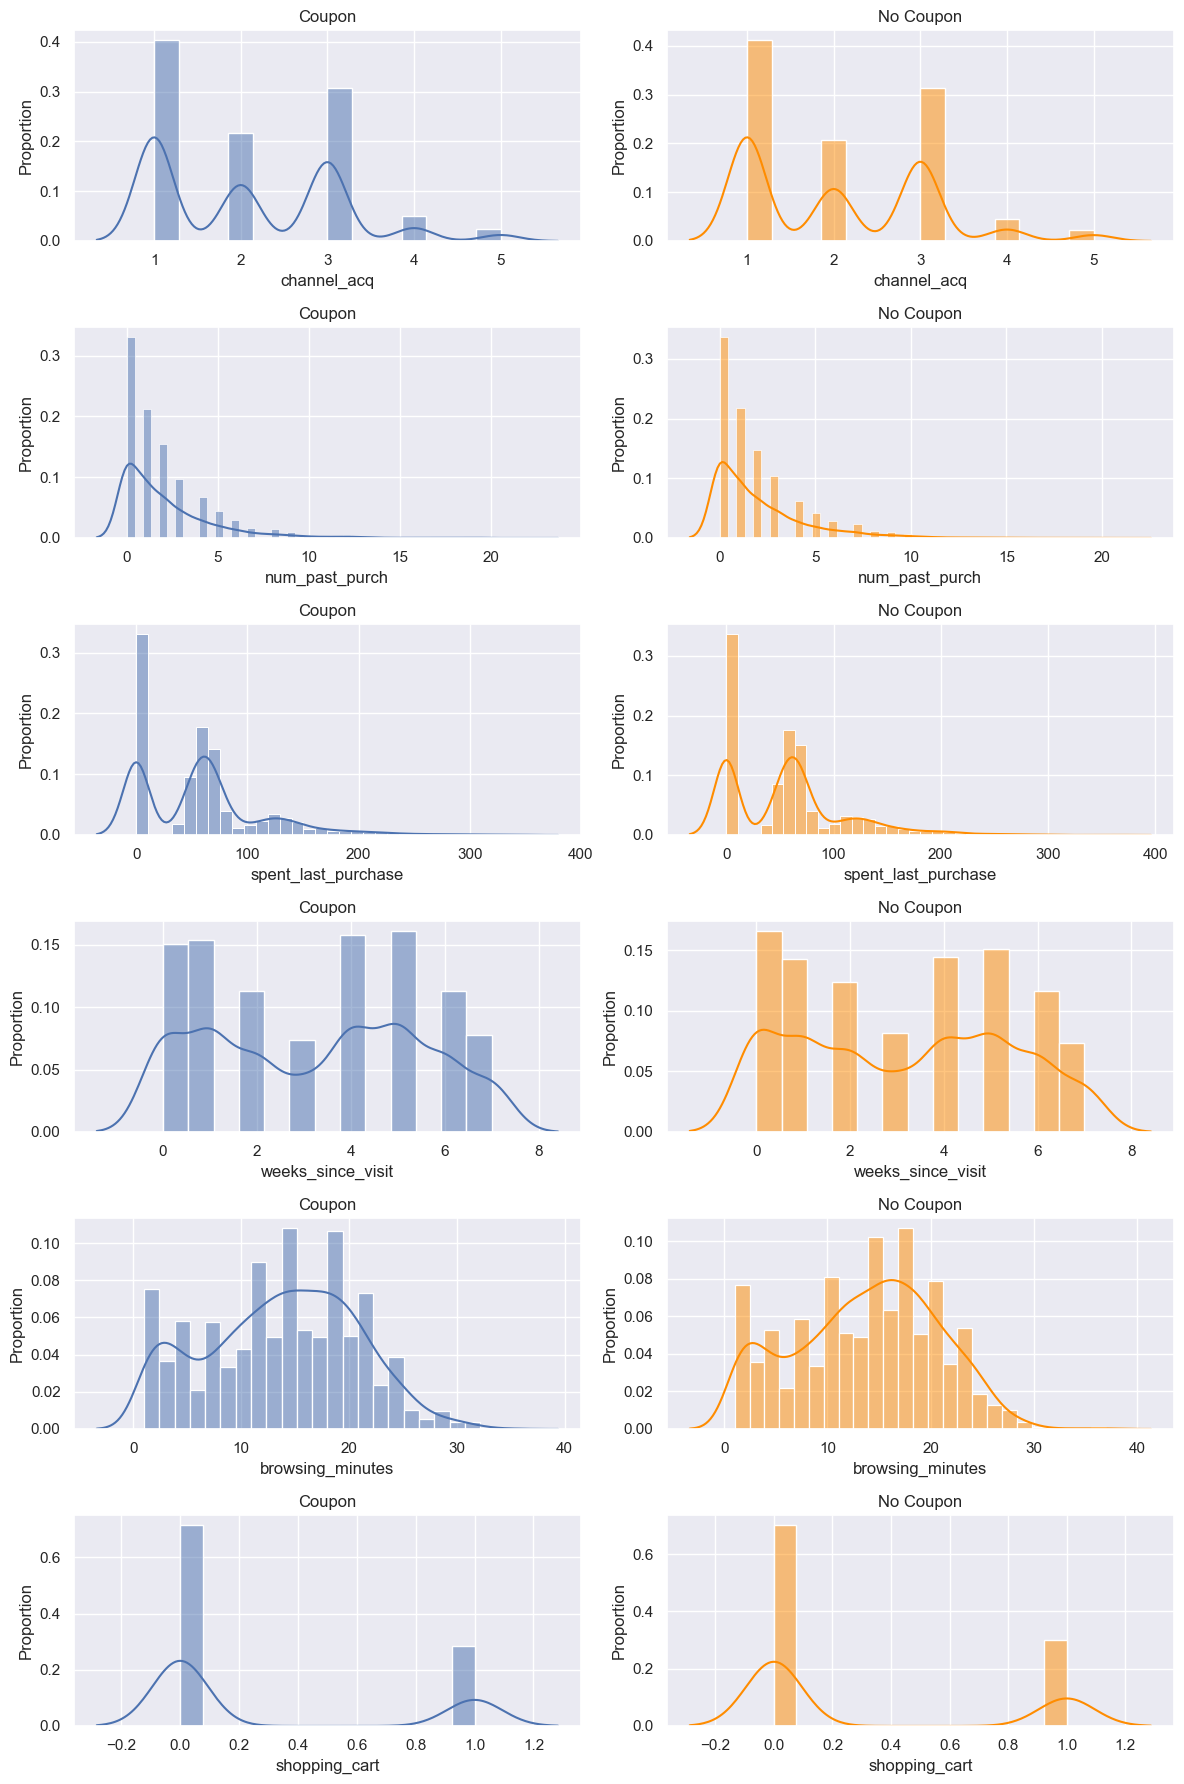

In [12]:
sns.set(color_codes=True)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 18)) #12 18

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot your Seaborn graphs on each subplot
for i in range(6):
    # Plot for coupon
    sns.histplot(coupon.iloc[:, i+4], ax=axes[2*i], kde=True, kde_kws=dict(cut=3), stat='proportion')
    axes[2*i].set_title('Coupon')
#     axes[2*i].set_title(f'Coupon - {coupon.columns[i+4]}')

    # Plot for no coupon
    sns.histplot(nocoupon.iloc[:, i+4], ax=axes[2*i+1], kde=True, kde_kws=dict(cut=3), stat='proportion',color='darkorange')
    axes[2*i+1].set_title('No Coupon')
#     axes[2*i+1].set_title(f'No Coupon - {coupon.columns[i+4]}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

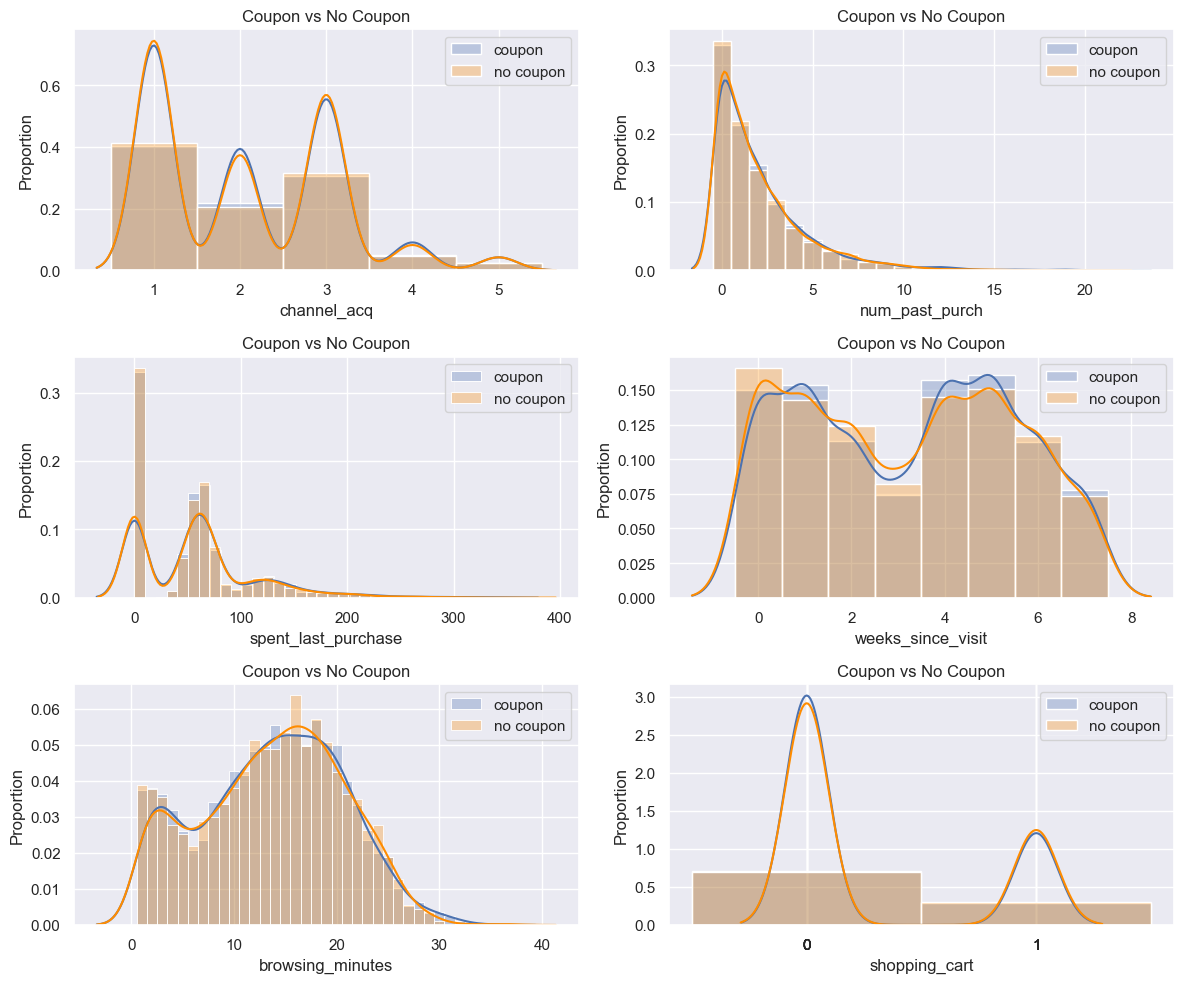

In [13]:
sns.set(color_codes=True)
plt.figure(figsize=(12,10))
columns = df.columns[4:]

plt.subplot(3,2,1)
sns.histplot(df[df['test_coupon']==1]['channel_acq'],label='coupon',kde=True,kde_kws=dict(cut=3),alpha=0.3,stat='proportion',discrete=True)
sns.histplot(df[df['test_coupon']==0]['channel_acq'],label='no coupon',kde=True,kde_kws=dict(cut=3),alpha=0.3,stat='proportion',discrete=True,color='darkorange')
plt.legend(loc='upper right')
plt.title('Coupon vs No Coupon')

plt.subplot(3,2,2)
sns.histplot(df[df['test_coupon']==1]['num_past_purch'],label='coupon',kde=True,kde_kws=dict(cut=3),alpha=0.3,stat='proportion',discrete=True)
sns.histplot(df[df['test_coupon']==0]['num_past_purch'],label='no coupon',kde=True,kde_kws=dict(cut=3),alpha=0.3,stat='proportion',discrete=True,color='darkorange')
plt.legend(loc='upper right')
plt.title('Coupon vs No Coupon')

plt.subplot(3,2,3)
sns.histplot(df[df['test_coupon']==1]['spent_last_purchase'],label='coupon',kde=True,kde_kws=dict(cut=3),alpha=0.3,stat='proportion',bins=15,binwidth=10)
sns.histplot(df[df['test_coupon']==0]['spent_last_purchase'],label='no coupon',kde=True,kde_kws=dict(cut=3),alpha=0.3,stat='proportion',bins=15,binwidth=10,color='darkorange')
plt.legend(loc='upper right')
plt.title('Coupon vs No Coupon')

plt.subplot(3,2,4)
sns.histplot(df[df['test_coupon']==1]['weeks_since_visit'],label='coupon',kde=True,kde_kws=dict(cut=3),alpha=0.3,stat='proportion',discrete=True)
sns.histplot(df[df['test_coupon']==0]['weeks_since_visit'],label='no coupon',kde=True,kde_kws=dict(cut=3),alpha=0.3,stat='proportion',discrete=True,color='darkorange')
plt.legend(loc='upper right')
plt.title('Coupon vs No Coupon')

plt.subplot(3,2,5)
sns.histplot(df[df['test_coupon']==1]['browsing_minutes'],label='coupon',kde=True,kde_kws=dict(cut=3),alpha=0.3,stat='proportion',discrete=True)
sns.histplot(df[df['test_coupon']==0]['browsing_minutes'],label='no coupon',kde=True,kde_kws=dict(cut=3),alpha=0.3,stat='proportion',discrete=True,color='darkorange')
plt.legend(loc='upper right')
plt.title('Coupon vs No Coupon')

plt.subplot(3,2,6)
sns.histplot(df[df['test_coupon']==1]['shopping_cart'],label='coupon',kde=True,kde_kws=dict(cut=3),alpha=0.3,stat='proportion',discrete=True)
sns.histplot(df[df['test_coupon']==0]['shopping_cart'],label='no coupon',kde=True,kde_kws=dict(cut=3),alpha=0.3,stat='proportion',discrete=True,color='darkorange')
plt.legend(loc='upper right')
plt.title('Coupon vs No Coupon')
plt.xticks([int(x) for x in plt.xticks()[0]]) # integers

plt.tight_layout()
plt.show()


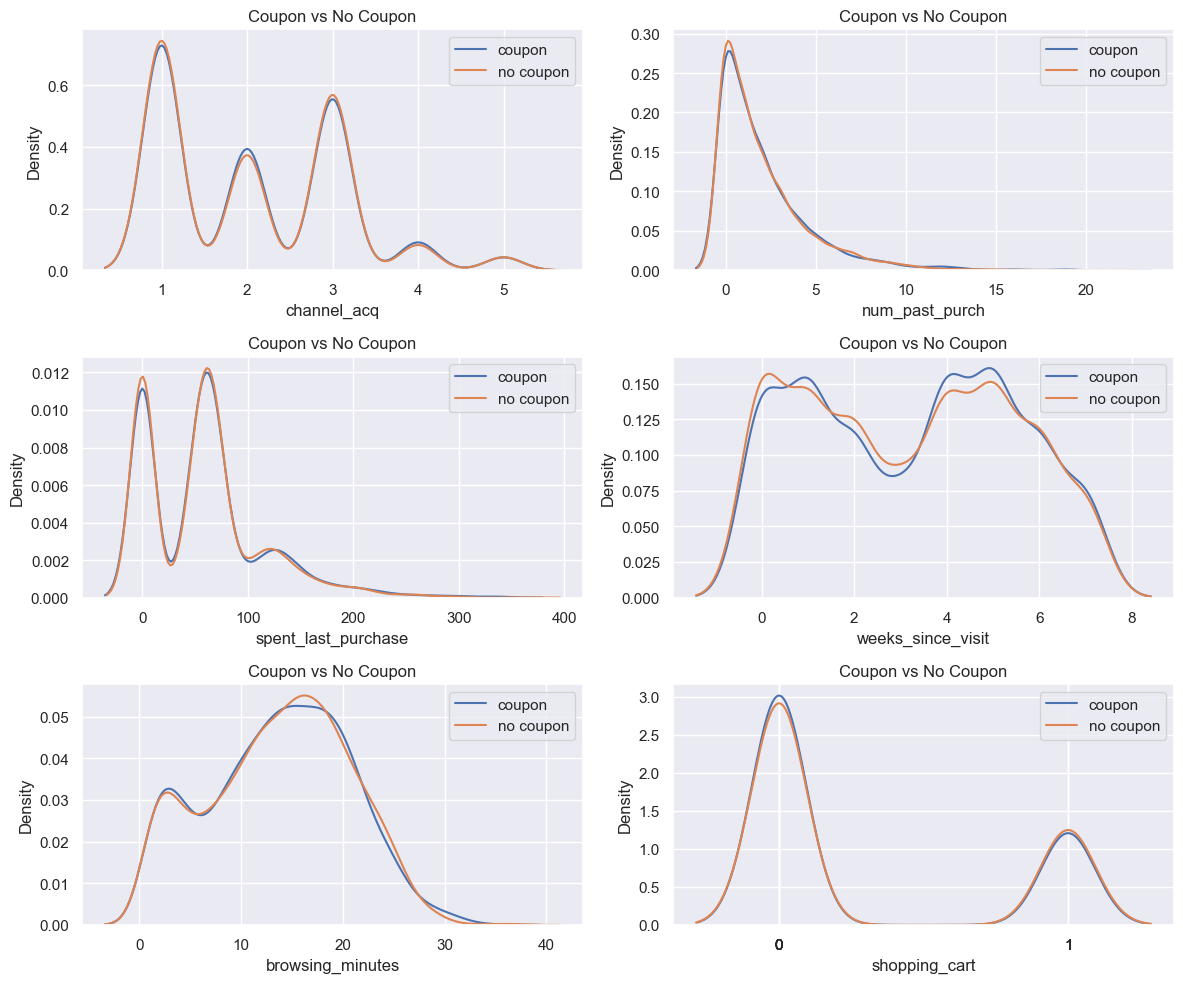

In [14]:
sns.set(color_codes=True)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10)) #12 18

for i in range(5):
    plt.subplot(3,2,i+1)
    sns.kdeplot(coupon.iloc[:, i+4],label='coupon')
    sns.kdeplot(nocoupon.iloc[:, i+4],label='no coupon')
    plt.title('Coupon vs No Coupon')
    plt.legend(loc='upper right')

plt.subplot(3,2,6)
sns.kdeplot(coupon.iloc[:, 9],label='coupon')
sns.kdeplot(nocoupon.iloc[:, 9],label='no coupon')
plt.title('Coupon vs No Coupon')
plt.legend(loc='upper right')
plt.xticks([int(x) for x in plt.xticks()[0]]) # integers

plt.tight_layout()
plt.show()


## Data Processing 

### TLDR:
#### In this assignment, some numerical variables could potentially be converted into categorical variables with respective pros and cons of this choice. One could also potentially argue that there is moderate level of correlation between num_past_purch and price_last_purch variable, so we may want to drop one of them.

#### For this assignment, we would like to still focus mainly on using numerical variables, and use both variables, although alternative options are worth exploring.

Based on the distribution of each attributes that we observed above, some numerical variables could potentially be converted into categorical variables. We change numerical variables to categorical variables through one-hot encoding

Pros of using Categorical Variables: 
1. Avoid non-linear relationships between the feature and the dependent variable
2. Make the model less sensitive to outliers, if exist.
3. Increase straightforward interpretability for the binned categorical variables, 
simplifies the understanding of the variable's impact on the target variable.
4. Data Sparsity: In situations where there is limited data within certain ranges of a numerical variable, 
binning can help ensure that these ranges are adequately represented in the dataset.

Cons of using Categorical Variables: 
1. Loss of Information: Binning inevitably results in a loss of information, as we're collapsing 
a range of values into a single category, and treat every sample within the category as the same.
2. Choice of Bin Width: The choice of how to bin the data is not always straightforward, 
and vary across personal judgments.
3. Data Distribution Changes: If the data distribution changes over time, or if we are working 
with new data, the chosen bins may not be suitable for the updated dataset.

In this data, num_past_purch, spent_last_purchase, weeks_since_visit and browsing minutes could potentially 
be converted to categorical data.

We will try modeling with both numerical data method (the above four attributes being numerical)
and categorical data method (the above four attributes being categorical).

However, although categorize numerical variables would help avoid non-linear relationships in the model and increase interpretability for groups, in this case we prefer to use variables in numerical form, as we don't want to treat people who's last purchase is \\$50 to be the same as people who's last purchase is \\$99. We would like to capture the potential increase in revenues resulted from last purchase price of \\$50 to \\$99. Also, if we use categorical variables, we could only target specific category, e.g. people with last purchase price of \\$50 - \\$100. By using numerical variables, we have the freedom to adjust the bar of targetting people, for example, we could target people with last purchase price of \\$30 and less and make predicitons, and adjust the bar to target people with last purchase price of \\$40 and less and make respective predictions. 

Thus, we would like to focus mainly on the results obtained from numerical data for this assignment for potentially more explainability. But it is worth noting that the categorical data is also worth exploring if we want a more comprehensive research. The adjusted R^2 value for numerical regression is about 0.18, while the adjusted R^2 value for categorical regression is about 0.11, which provides evidence that it is better to go with numerical in this case.

#### Decisions if we were to convert to categorical:

1. num_past_purch to be a categorical variable with 3 categories, past purchase = 0, (1, 2), (3+), corresponding to 1,2,3. 

2. spent_last_purchase to be a categorical variable with 3 categories, past purchase expenditure = 0, 0-100, 100+(including 100), corresponding to 1,2,3.

3. weeks_since_visit to be a categorical variable with 2 categories, weeks since visit = (0,1,2,3) and (4+, including 4), corresponding to 1 and 2.

4. browsing_minutes to be a categorical variable with 2 categories, browsing minutes = (1-6) and (7+), corresponding to 1 and 2.

In [15]:
def cv_to_dv(df,cv_name,thresholds,dv_name=None):
    dv_name = dv_name or cv_name
    thresholds = [df[cv_name].min(),*thresholds,df[cv_name].max()]
    for i in range(len(thresholds)-1):
        if i == 0:
            df[f'{dv_name}_{i+1}'] = (df[cv_name]<=thresholds[i+1])*1
        elif i == len(thresholds)-2:
            df[f'{dv_name}_{i+1}'] = (df[cv_name]>thresholds[i])*1
        else:
            df[f'{dv_name}_{i+1}'] = ((df[cv_name]>thresholds[i]) & (df[cv_name]<=thresholds[i+1]))*1

In [16]:
df_tot = df.copy()
cv_to_dv(df_tot,'channel_acq',[1,2,3,4]) 
# categorical, but could use the same function.
cv_to_dv(df_tot,'num_past_purch',[0,2],'num_past_purch_cat')  
cv_to_dv(df_tot,'spent_last_purchase',[0,99],'spent_last_purch_cat') 
cv_to_dv(df_tot,'weeks_since_visit',[3],'weeks_since_visit_cat') 
cv_to_dv(df_tot,'browsing_minutes',[6],'browsing_minutes_cat')
df_tot.columns = ['id', 'trans_after', 'revenue_after', 'test_coupon', 'channel_acq',
       'num_past_purch', 'spent_last_purch', 'weeks_since_visit',
       'browsing_minutes', 'shopping_cart', 'channel_acq_1', 'channel_acq_2',
       'channel_acq_3', 'channel_acq_4', 'channel_acq_5',
       'num_past_purch_cat_1', 'num_past_purch_cat_2', 'num_past_purch_cat_3',
       'spent_last_purch_cat_1', 'spent_last_purch_cat_2',
       'spent_last_purch_cat_3', 'weeks_since_visit_cat_1',
       'weeks_since_visit_cat_2', 'browsing_minutes_cat_1',
       'browsing_minutes_cat_2']
df_tot

,id,trans_after,revenue_after,test_coupon,channel_acq,num_past_purch,spent_last_purch,weeks_since_visit,browsing_minutes,shopping_cart,...,num_past_purch_cat_1,num_past_purch_cat_2,num_past_purch_cat_3,spent_last_purch_cat_1,spent_last_purch_cat_2,spent_last_purch_cat_3,weeks_since_visit_cat_1,weeks_since_visit_cat_2,browsing_minutes_cat_1,browsing_minutes_cat_2
0,AB_1,0,0.00,0,2,6,62.99,6,1,0,...,0,0,1,0,1,0,0,1,1,0
1,AB_2,0,0.00,1,1,2,53.99,0,7,1,...,0,1,0,0,1,0,1,0,0,1
2,AB_3,0,0.00,1,2,3,88.98,3,4,0,...,0,0,1,0,1,0,1,0,1,0
3,AB_4,0,0.00,0,2,1,68.99,1,19,0,...,0,1,0,0,1,0,1,0,0,1
4,AB_5,0,0.00,1,3,3,66.49,4,20,0,...,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,AB_4996,1,51.49,0,2,3,51.49,1,9,1,...,0,0,1,0,1,0,1,0,0,1
4996,AB_4997,0,0.00,1,1,0,0.00,3,8,0,...,1,0,0,1,0,0,1,0,0,1
4997,AB_4998,0,0.00,1,1,1,60.49,4,17,0,...,0,1,0,0,1,0,0,1,0,1
4998,AB_4999,0,0.00,1,1,0,0.00,2,14,1,...,1,0,0,1,0,0,1,0,0,1


In [17]:
df_tot['spent_last_purch_cat_1'].equals(df_tot['num_past_purch_cat_1'])

True

spent_last_purch_cat_1 and num_past_purch_cat_1 actually equal!
It makes sense when you think about number of past purchase = 0 and last purchase price = 0

In [18]:
df_num = df_tot[['id', 'trans_after', 'revenue_after', 'test_coupon',
                 'channel_acq_1', 'channel_acq_2',
                'channel_acq_3', 'channel_acq_4', 'channel_acq_5',
                'num_past_purch', 'spent_last_purch', 'weeks_since_visit',
                'browsing_minutes', 'shopping_cart']].copy()

df_cat = df_tot[['id', 'trans_after', 'revenue_after', 'test_coupon',
                 'channel_acq_1', 'channel_acq_2',
       'channel_acq_3', 'channel_acq_4', 'channel_acq_5', 
       'num_past_purch_cat_1', 'num_past_purch_cat_2', 'num_past_purch_cat_3',
       'spent_last_purch_cat_1', 'spent_last_purch_cat_2',
       'spent_last_purch_cat_3', 'weeks_since_visit_cat_1',
       'weeks_since_visit_cat_2', 'browsing_minutes_cat_1',
       'browsing_minutes_cat_2', 'shopping_cart']].copy()

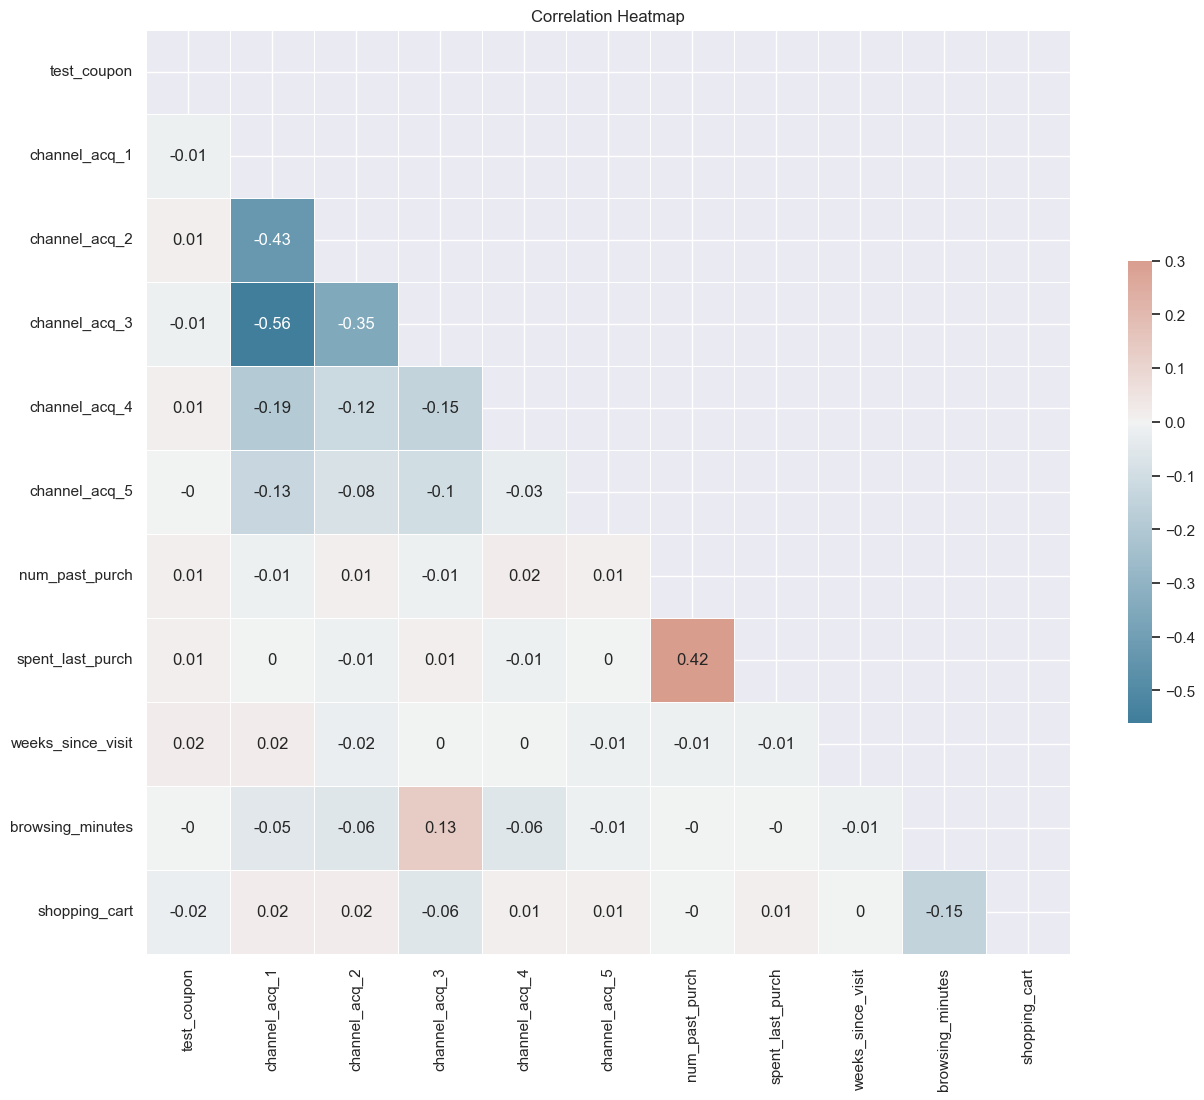

In [19]:
# Compute the correlation matrix for numerical variables method
# exclude dependent variables.
corr = df_num.iloc[:,3:].corr().round(decimals=2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

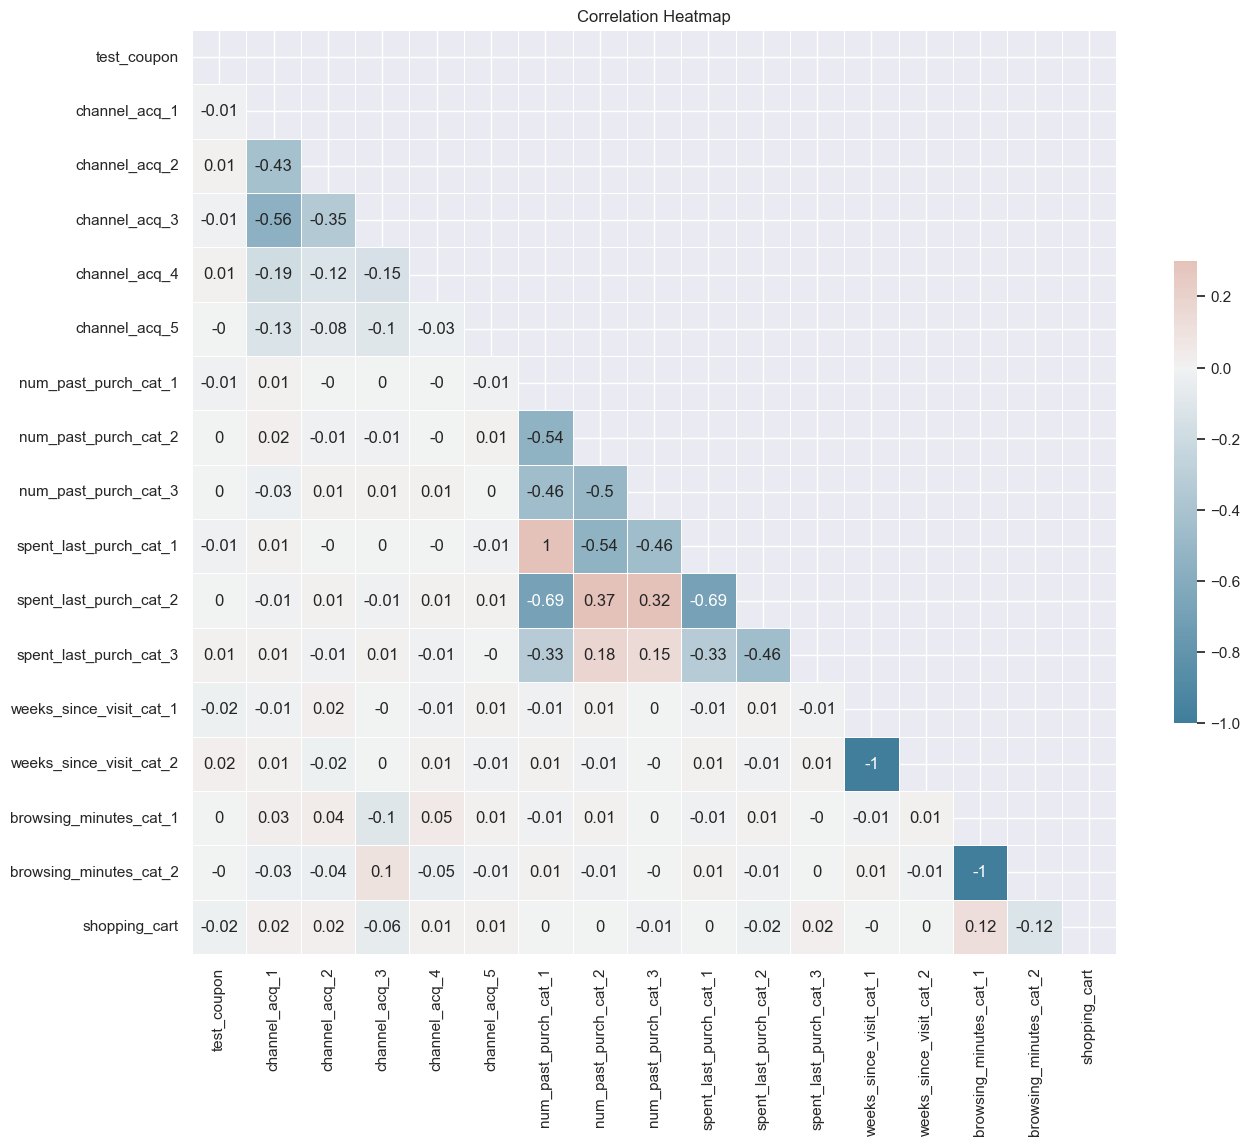

In [20]:
# Compute the correlation matrix for categorical variables method
# exclude dependent variables.
corr = df_cat.iloc[:,3:].corr().round(decimals=2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

Overall, there seem to have some correlation between num_past_purch and spent_last_purch variable, and the correlation is around 0.4. While still below the common bar of around 0.7 to drop a variable when two variables are highly correlated, this situation may be worth monitoring.

We may try drop one of the two variables in later models and see the performance.

As a result, it turns out that we could potentially leave both variables, or only keep num_past_purchase only, as num_past_purchase seem to provide more explainability in the model as well as statistical significance.

### 1. Chi Squared Test

In [21]:
# channel_acq
chi2, p, dof, expected = chi2_contingency(channel_acq.values[:,1:3])
# chi squared, p-value, degrees of freedom
chi2, p, dof

(1.7821470415820906, 0.7757469925018307, 4)

In [22]:
# num_past_purch
chi2, p, dof, expected = chi2_contingency(num_past_purch.values[:,1:3])
# chi squared, p-value, degrees of freedom
chi2, p, dof

(16.1214292179676, 0.7627900647217117, 21)

In [23]:
# spent_last_purchase
chi2, p, dof, expected = chi2_contingency(spent_last_purchase.values[:,1:3])
# chi squared, p-value, degrees of freedom
chi2, p, dof

(326.0206503295818, 0.5669285704255229, 331)

In [24]:
# weeks_since_visit
chi2, p, dof, expected = chi2_contingency(weeks_since_visit.values[:,1:3])
# chi squared, p-value, degrees of freedom
chi2, p, dof

(7.893710919243363, 0.34205969422721405, 7)

In [25]:
# browsing_minutes
chi2, p, dof, expected = chi2_contingency(browsing_minutes.values[:,1:3])
# chi squared, p-value, degrees of freedom
chi2, p, dof

(29.50729799109542, 0.7693786467958749, 36)

In [26]:
# shopping_cart
chi2, p, dof, expected = chi2_contingency(shopping_cart.values[:,1:3])
# chi squared, p-value, degrees of freedom
chi2, p, dof

(1.1278138143014018, 0.28824213705091606, 1)

In [27]:
def get_p(df):
    chi2, p, dof, expected = chi2_contingency(df.values[:,1:3])
    return p

p_value = []
p_value.append(get_p(channel_acq))
p_value.append(get_p(num_past_purch))
p_value.append(get_p(spent_last_purchase))
p_value.append(get_p(weeks_since_visit))
p_value.append(get_p(browsing_minutes))
p_value.append(get_p(shopping_cart))

In [28]:
p_value_df = pd.DataFrame(p_value, index=['channel_acq',
                     'num_past_purch','spent_last_purchase',
                     'weeks_since_visit','browsing_minutes',
                                          'shopping_cart'])

p_value_df.columns=['p-value']
p_value_df['Significant']= (p_value_df['p-value']<=0.05)
p_value_df

,p-value,Significant
channel_acq,0.775747,False
num_past_purch,0.762790,False
spent_last_purchase,0.566929,False
weeks_since_visit,0.342060,False
browsing_minutes,0.769379,False
shopping_cart,0.288242,False


## Q2 Did the coupon increase revenues? Did it increase transactions?

### 0. Numerical Result

In [29]:
avg_df = pd.DataFrame(np.array([[coupon.shape[0],nocoupon.shape[0]], 
                            [sum(coupon['trans_after']),
                             sum(nocoupon['trans_after'])], 
                            [sum(coupon['revenue_after']), 
                             sum(nocoupon['revenue_after'])]]),
                            columns=['coupon','nocoupon'],
                            index=['count','tot_trans_after',
                                   'tot_revenue_after']).T
avg_df['avg_trans_after'] = avg_df['tot_trans_after'] / avg_df['count']
avg_df['avg_revenue_after'] = avg_df['tot_revenue_after'] / avg_df['count']
avg_df

,count,tot_trans_after,tot_revenue_after,avg_trans_after,avg_revenue_after
coupon,2502.0,380.0,18861.76,0.151878,7.538673
nocoupon,2498.0,314.0,19434.86,0.125701,7.780168


In [30]:
change_tot_list = [avg_df['tot_trans_after'][0] - avg_df['tot_trans_after'][1],
                  avg_df['tot_revenue_after'][0] - avg_df['tot_revenue_after'][1]]
change_tot_df=pd.DataFrame(change_tot_list, columns=['change after coupon']).T
change_tot_df.columns = ['tot_trans', 'tot_revenue']

change_avg_list = [avg_df['avg_trans_after'][0] - avg_df['avg_trans_after'][1],
                  avg_df['avg_revenue_after'][0] - avg_df['avg_revenue_after'][1]]
change_avg_df=pd.DataFrame(change_avg_list, columns=['change after coupon']).T
change_avg_df.columns = ['avg_trans', 'avg_revenue']

In [31]:
# Change after giving coupon
change_tot_df

,tot_trans,tot_revenue
change after coupon,66.0,-573.1


In [32]:
# Change after giving coupon
change_avg_df

,avg_trans,avg_revenue
change after coupon,0.026178,-0.241495


### 1. Confidence Interval and Hypothesis Test of the Difference Between Per Person Values

For both numbers of transfers per person difference (before - after) and revenue per person difference (before - after), we construct 95% confidence interval with the null hypothesis that p1 - p2 = 0, and see if the confidence interval involves 0.

If 0 is within the confidence interval, then we fail to reject the null hypothesis that p1-p2 = 0, there is no statistically significant change.

We can carry out this hypothesis test because of the assumption of Q1 that the team managed to randomize the customers successfully.

In [33]:
# revenue_after
p1 = avg_df['avg_revenue_after'][0] 
p2 = avg_df['avg_revenue_after'][1]
n1 = avg_df['count'][0]
n2 = avg_df['count'][1]
std1 = coupon['revenue_after'].std()
std2 = nocoupon['revenue_after'].std()
lower = p1 - p2 - 1.96 * np.sqrt(std1**2/n1 + std2**2/n2)
upper = p1 - p2 + 1.96 * np.sqrt(std1**2/n1 + std2**2/n2)
print(lower)
print(upper)
print(lower<0<upper)
print('0 is in the confidence interval.')

-1.551547628228691
1.0685574823149806
True
0 is in the confidence interval.


Coupon is not statistically significant at affecting revenues.

In [34]:
# transfer_after
p1 = avg_df['avg_trans_after'][0] 
p2 = avg_df['avg_trans_after'][1]
n1 = avg_df['count'][0]
n2 = avg_df['count'][1]
std1 = coupon['trans_after'].std()
std2 = nocoupon['trans_after'].std()
lower = p1 - p2 - 1.96 * np.sqrt(std1**2/n1 + std2**2/n2)
upper = p1 - p2 + 1.96 * np.sqrt(std1**2/n1 + std2**2/n2)
print(lower)
print(upper)
print(lower<0<upper)
print('0 is not in the confidence interval.')

0.002934037878977079
0.04942183562878192
False
0 is not in the confidence interval.


Coupon is statistically significant at increasing transactions, 
giving the confidence interval is slightly above 0.

### 2. Regression and Test for Statistical Significance

Regress both revenue and transactions respectively on all other variables, and see if the coefficient on coupon is significant or not, and check the direction of the coefficient.

Here, we try regression on both numerical data and categorical data.

#### Revenue

In [35]:
# numerical
model = smf.ols('''revenue_after ~ test_coupon
                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + num_past_purch
                            + spent_last_purch
                            + weeks_since_visit
                            + browsing_minutes
                            + shopping_cart
                            ''', data = df_num)
result = model.fit()
rev_num_p = result.pvalues['test_coupon']
rev_num_param = result.params['test_coupon']
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     103.1
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          5.31e-195
Time:                        18:03:01   Log-Likelihood:                -22437.
No. Observations:                5000   AIC:                         4.490e+04
Df Residuals:                    4989   BIC:                         4.497e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.8885      1.031     -2.800      0.005      -4.911      -0.866
test_coupon          -0.2825      0.609     -0.464      0.643      -1.477       0.912
channel_acq_2         6.0448      0.817      7.403      0.000       4.444       7.646
channel_acq_3         5.9766      0.730      8.186      0.000       4.545       7.408
channel_acq_4         6.6568      1.477      4.506      0.000       3.761       9.553
channel_acq_5         8.6959      2.056      4.230      0.000       4.666      12.726
num_past_purch        3.1727      0.131     24.194      0.000       2.916       3.430
spent_last_purch     -0.0144      0.006     -2.382      0.017      -0.026      -0.003
weeks_since_visit    -1.1128      0.135     -8.248      0.000      -1.377      -0.848
browsing_minutes      0.1606      0.045      3.598      0.000       0.073       0.248
shopping_cart         9.3086      0.678     13.731      0.000       7.980      10.638
==============================================================================
Omnibus:                     3314.005   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48628.751
Skew:                           3.001   Prob(JB):                         0.00
Kurtosis:                      17.050   Cond. No.                         549.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# categorical
model = smf.ols('''revenue_after ~ test_coupon
                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + num_past_purch_cat_2
                            + num_past_purch_cat_3
                            + spent_last_purch_cat_2
                            + spent_last_purch_cat_3
                            + weeks_since_visit_cat_2
                            + browsing_minutes_cat_2
                            + shopping_cart
                            ''', data = df_cat)
result = model.fit()
rev_cat_p = result.pvalues['test_coupon']
rev_cat_param = result.params['test_coupon']
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     49.25
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          5.75e-112
Time:                        18:03:01   Log-Likelihood:                -22626.
No. Observations:                5000   AIC:                         4.528e+04
Df Residuals:                    4987   BIC:                         4.536e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.8500      1.149     -1.611      0.107      -4.102       0.402
test_coupon                -0.0973      0.633     -0.154      0.878      -1.338       1.144
channel_acq_2               6.0703      0.848      7.156      0.000       4.407       7.733
channel_acq_3               5.9565      0.757      7.869      0.000       4.473       7.440
channel_acq_4               7.2619      1.534      4.735      0.000       4.255      10.269
channel_acq_5               9.2792      2.136      4.345      0.000       5.092      13.466
num_past_purch_cat_2     5.315e+10   2.63e+13      0.002      0.998   -5.14e+13    5.15e+13
num_past_purch_cat_3     5.315e+10   2.63e+13      0.002      0.998   -5.14e+13    5.15e+13
spent_last_purch_cat_2  -5.315e+10   2.63e+13     -0.002      0.998   -5.15e+13    5.14e+13
spent_last_purch_cat_3  -5.315e+10   2.63e+13     -0.002      0.998   -5.15e+13    5.14e+13
weeks_since_visit_cat_2    -4.8735      0.633     -7.697      0.000      -6.115      -3.632
browsing_minutes_cat_2      1.7554      0.818      2.146      0.032       0.152       3.359
shopping_cart               9.0682      0.701     12.935      0.000       7.694      10.443
==============================================================================
Omnibus:                     3568.305   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57955.784
Skew:                           3.298   Prob(JB):                         0.00
Kurtosis:                      18.320   Cond. No.                     2.88e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.81e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Transaction

In [37]:
# numerical
model = smf.ols('''trans_after ~ test_coupon
                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + num_past_purch
                            + spent_last_purch
                            + weeks_since_visit
                            + browsing_minutes
                            + shopping_cart
                            ''', data = df_num)
result = model.fit()
trans_num_p = result.pvalues['test_coupon'] 
trans_num_param = result.params['test_coupon']
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     107.7
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          3.35e-203
Time:                        18:03:01   Log-Likelihood:                -2262.1
No. Observations:                5000   AIC:                             4546.
Df Residuals:                    4989   BIC:                             4618.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0649      0.018     -3.558      0.000      -0.101      -0.029
test_coupon           0.0256      0.011      2.377      0.017       0.004       0.047
channel_acq_2         0.1131      0.014      7.829      0.000       0.085       0.141
channel_acq_3         0.1083      0.013      8.387      0.000       0.083       0.134
channel_acq_4         0.1295      0.026      4.958      0.000       0.078       0.181
channel_acq_5         0.1587      0.036      4.364      0.000       0.087       0.230
num_past_purch        0.0571      0.002     24.620      0.000       0.053       0.062
spent_last_purch     -0.0004      0.000     -3.431      0.001      -0.001      -0.000
weeks_since_visit    -0.0204      0.002     -8.547      0.000      -0.025      -0.016
browsing_minutes      0.0031      0.001      3.910      0.000       0.002       0.005
shopping_cart         0.1728      0.012     14.411      0.000       0.149       0.196
==============================================================================
Omnibus:                     3203.438   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46582.580
Skew:                           2.861   Prob(JB):                         0.00
Kurtosis:                      16.815   Cond. No.                         549.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# categorical
model = smf.ols('''trans_after ~ test_coupon
                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + num_past_purch_cat_2
                            + num_past_purch_cat_3
                            + spent_last_purch_cat_2
                            + spent_last_purch_cat_3
                            + weeks_since_visit_cat_2
                            + browsing_minutes_cat_2
                            + shopping_cart
                            ''', data = df_cat)
result = model.fit()
trans_cat_p = result.pvalues['test_coupon'] 
trans_cat_param = result.params['test_coupon']
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     51.93
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          4.33e-118
Time:                        18:03:01   Log-Likelihood:                -2456.2
No. Observations:                5000   AIC:                             4938.
Df Residuals:                    4987   BIC:                             5023.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0496      0.020     -2.441      0.015      -0.089      -0.010
test_coupon                 0.0288      0.011      2.570      0.010       0.007       0.051
channel_acq_2               0.1137      0.015      7.569      0.000       0.084       0.143
channel_acq_3               0.1084      0.013      8.088      0.000       0.082       0.135
channel_acq_4               0.1404      0.027      5.171      0.000       0.087       0.194
channel_acq_5               0.1689      0.038      4.467      0.000       0.095       0.243
num_past_purch_cat_2     2.719e+10   4.65e+11      0.058      0.953   -8.84e+11    9.39e+11
num_past_purch_cat_3     2.719e+10   4.65e+11      0.058      0.953   -8.84e+11    9.39e+11
spent_last_purch_cat_2  -2.719e+10   4.65e+11     -0.058      0.953   -9.39e+11    8.84e+11
spent_last_purch_cat_3  -2.719e+10   4.65e+11     -0.058      0.953   -9.39e+11    8.84e+11
weeks_since_visit_cat_2    -0.0890      0.011     -7.944      0.000      -0.111      -0.067
browsing_minutes_cat_2      0.0306      0.014      2.116      0.034       0.002       0.059
shopping_cart               0.1679      0.012     13.530      0.000       0.144       0.192
==============================================================================
Omnibus:                     3414.799   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51217.471
Skew:                           3.125   Prob(JB):                         0.00
Kurtosis:                      17.380   Cond. No.                     2.88e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.81e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
test_coupon_rev = pd.DataFrame(data = {'Revenue p-value': [rev_num_p, rev_cat_p], 
                    'Significant': [rev_num_p<=0.05, rev_cat_p<=0.05],
                    'Coefficient': [rev_num_param, rev_cat_param],
                    'Is Coefficient Positive': [rev_num_param>0, rev_cat_param>0]},   
                    index=['Numerical', 'Categorical'])
test_coupon_rev

,Revenue p-value,Significant,Coefficient,Is Coefficient Positive
Numerical,0.643009,False,-0.282455,False
Categorical,0.877900,False,-0.097269,False


In [40]:
test_coupon_trans = pd.DataFrame(data = {'Transaction p-value': [trans_num_p, trans_cat_p], 
                    'Significant': [trans_num_p<=0.05, trans_cat_p<=0.05],
                    'Coefficient': [trans_num_param, trans_cat_param],
                    'Is Coefficient Positive': [trans_num_param>0, trans_cat_param>0]},
                    index=['Numerical', 'Categorical'])
test_coupon_trans

,Transaction p-value,Significant,Coefficient,Is Coefficient Positive
Numerical,0.017491,True,0.025619,True
Categorical,0.010204,True,0.028802,True


Coupon is not statistically significant at affecting revenues in both cases with a p-value > 0.05, also, the coefficient is actually negative in both cases.

Coupon is statistically significant at increasing transactions in both cases with a p-value <= 0.05, and the coefficient of test_coupon is positive in both cases.

## Q3 Which customers should be targeted in the next targeting campaign?

## 1. Numerical

### A. Revenue

#### (1) Include both num_past_purch and spent_last_purch

In [41]:
# Largest Model
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + spent_last_purch
                            + spent_last_purch * test_coupon
                            
                            + weeks_since_visit
                            + weeks_since_visit * test_coupon
                            
                            + browsing_minutes
                            + browsing_minutes * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     56.35
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          6.52e-194
Time:                        18:03:01   Log-Likelihood:                -22419.
No. Observations:                5000   AIC:                         4.488e+04
Df Residuals:                    4980   BIC:                         4.501e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -2.4944      1.391     -1.794      0.073      -5.221       0.232
test_coupon                      -1.0287      1.973     -0.521      0.602      -4.897       2.839
channel_acq_2                     5.2308      1.160      4.508      0.000       2.956       7.506
channel_acq_3                     4.4410      1.023      4.341      0.000       2.435       6.447
channel_acq_4                     5.2979      2.133      2.484      0.013       1.117       9.479
channel_acq_5                     9.0388      2.900      3.117      0.002       3.354      14.723
channel_acq_2:test_coupon         1.6582      1.631      1.017      0.309      -1.539       4.855
channel_acq_3:test_coupon         3.1126      1.457      2.137      0.033       0.257       5.968
channel_acq_4:test_coupon         2.6748      2.950      0.907      0.365      -3.109       8.459
channel_acq_5:test_coupon        -0.4824      4.102     -0.118      0.906      -8.524       7.560
num_past_purch                    3.8584      0.192     20.091      0.000       3.482       4.235
num_past_purch:test_coupon       -1.2772      0.262     -4.868      0.000      -1.792      -0.763
spent_last_purch                 -0.0221      0.009     -2.509      0.012      -0.039      -0.005
spent_last_purch:test_coupon      0.0135      0.012      1.120      0.263      -0.010       0.037
weeks_since_visit                -1.1200      0.190     -5.895      0.000      -1.492      -0.748
weeks_since_visit:test_coupon     0.0026      0.269      0.010      0.992      -0.525       0.531
browsing_minutes                  0.1511      0.063      2.403      0.016       0.028       0.274
browsing_minutes:test_coupon      0.0170      0.089      0.190      0.849      -0.158       0.192
shopping_cart                     7.6928      0.948      8.116      0.000       5.835       9.551
shopping_cart:test_coupon         3.1323      1.354      2.313      0.021       0.478       5.787
==============================================================================
Omnibus:                     3269.938   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46407.375
Skew:                           2.958   Prob(JB):                         0.00
Kurtosis:                      16.703   Cond. No.                     1.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + spent_last_purch
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     66.86
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          2.35e-196
Time:                        18:03:01   Log-Likelihood:                -22420.
No. Observations:                5000   AIC:                         4.487e+04
Df Residuals:                    4983   BIC:                         4.498e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.8970      1.136     -2.549      0.011      -5.125      -0.669
test_coupon                   -0.2558      1.142     -0.224      0.823      -2.495       1.983
channel_acq_2                  5.2542      1.160      4.530      0.000       2.980       7.528
channel_acq_3                  4.4257      1.021      4.334      0.000       2.424       6.428
channel_acq_4                  5.3709      2.131      2.521      0.012       1.194       9.548
channel_acq_5                  9.0657      2.899      3.128      0.002       3.383      14.748
channel_acq_2:test_coupon      1.6194      1.629      0.994      0.320      -1.575       4.814
channel_acq_3:test_coupon      3.1449      1.449      2.170      0.030       0.304       5.986
channel_acq_4:test_coupon      2.5729      2.946      0.873      0.383      -3.203       8.349
channel_acq_5:test_coupon     -0.4935      4.101     -0.120      0.904      -8.533       7.546
num_past_purch                 3.7894      0.182     20.832      0.000       3.433       4.146
num_past_purch:test_coupon    -1.1533      0.238     -4.849      0.000      -1.620      -0.687
spent_last_purch              -0.0149      0.006     -2.473      0.013      -0.027      -0.003
weeks_since_visit             -1.1159      0.135     -8.290      0.000      -1.380      -0.852
browsing_minutes               0.1597      0.045      3.583      0.000       0.072       0.247
shopping_cart                  7.6921      0.944      8.152      0.000       5.842       9.542
shopping_cart:test_coupon      3.1114      1.339      2.324      0.020       0.486       5.736
==============================================================================
Omnibus:                     3272.214   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46570.614
Skew:                           2.959   Prob(JB):                         0.00
Kurtosis:                      16.730   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### B. Transaction

#### (1) Include both num_past_purch and spent_last_purch

In [43]:
# Largest Regression
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + spent_last_purch
                            + spent_last_purch * test_coupon
                            
                            + weeks_since_visit
                            + weeks_since_visit * test_coupon
                            
                            + browsing_minutes
                            + browsing_minutes * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     58.39
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.09e-200
Time:                        18:03:01   Log-Likelihood:                -2247.8
No. Observations:                5000   AIC:                             4536.
Df Residuals:                    4980   BIC:                             4666.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.0357      0.025     -1.449      0.147      -0.084       0.013
test_coupon                      -0.0324      0.035     -0.927      0.354      -0.101       0.036
channel_acq_2                     0.0856      0.021      4.166      0.000       0.045       0.126
channel_acq_3                     0.0709      0.018      3.918      0.000       0.035       0.106
channel_acq_4                     0.0909      0.038      2.408      0.016       0.017       0.165
channel_acq_5                     0.1646      0.051      3.208      0.001       0.064       0.265
channel_acq_2:test_coupon         0.0522      0.029      1.810      0.070      -0.004       0.109
channel_acq_3:test_coupon         0.0749      0.026      2.907      0.004       0.024       0.125
channel_acq_4:test_coupon         0.0756      0.052      1.448      0.148      -0.027       0.178
channel_acq_5:test_coupon        -0.0094      0.073     -0.130      0.897      -0.152       0.133
num_past_purch                    0.0620      0.003     18.248      0.000       0.055       0.069
num_past_purch:test_coupon       -0.0090      0.005     -1.939      0.053      -0.018    9.89e-05
spent_last_purch                 -0.0005      0.000     -2.938      0.003      -0.001      -0.000
spent_last_purch:test_coupon      0.0002      0.000      0.816      0.414      -0.000       0.001
weeks_since_visit                -0.0182      0.003     -5.417      0.000      -0.025      -0.012
weeks_since_visit:test_coupon    -0.0047      0.005     -0.980      0.327      -0.014       0.005
browsing_minutes                  0.0025      0.001      2.215      0.027       0.000       0.005
browsing_minutes:test_coupon      0.0013      0.002      0.806      0.420      -0.002       0.004
shopping_cart                     0.1281      0.017      7.637      0.000       0.095       0.161
shopping_cart:test_coupon         0.0901      0.024      3.760      0.000       0.043       0.137
==============================================================================
Omnibus:                     3165.478   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44659.523
Skew:                           2.825   Prob(JB):                         0.00
Kurtosis:                      16.507   Cond. No.                     1.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + spent_last_purch
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     69.20
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          6.12e-203
Time:                        18:03:01   Log-Likelihood:                -2249.0
No. Observations:                5000   AIC:                             4532.
Df Residuals:                    4983   BIC:                             4643.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.0405      0.020     -2.013      0.044      -0.080      -0.001
test_coupon                   -0.0231      0.020     -1.142      0.253      -0.063       0.017
channel_acq_2                  0.0860      0.021      4.187      0.000       0.046       0.126
channel_acq_3                  0.0699      0.018      3.869      0.000       0.034       0.105
channel_acq_4                  0.0928      0.038      2.460      0.014       0.019       0.167
channel_acq_5                  0.1642      0.051      3.200      0.001       0.064       0.265
channel_acq_2:test_coupon      0.0520      0.029      1.802      0.072      -0.005       0.108
channel_acq_3:test_coupon      0.0772      0.026      3.011      0.003       0.027       0.128
channel_acq_4:test_coupon      0.0730      0.052      1.400      0.162      -0.029       0.175
channel_acq_5:test_coupon     -0.0085      0.073     -0.118      0.906      -0.151       0.134
num_past_purch                 0.0611      0.003     18.981      0.000       0.055       0.067
num_past_purch:test_coupon    -0.0074      0.004     -1.750      0.080      -0.016       0.001
spent_last_purch              -0.0004      0.000     -3.439      0.001      -0.001      -0.000
weeks_since_visit             -0.0205      0.002     -8.606      0.000      -0.025      -0.016
browsing_minutes               0.0031      0.001      3.933      0.000       0.002       0.005
shopping_cart                  0.1289      0.017      7.719      0.000       0.096       0.162
shopping_cart:test_coupon      0.0874      0.024      3.687      0.000       0.041       0.134
==============================================================================
Omnibus:                     3169.603   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44954.149
Skew:                           2.829   Prob(JB):                         0.00
Kurtosis:                      16.556   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            
                            + spent_last_purch
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     73.58
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          3.17e-203
Time:                        18:03:01   Log-Likelihood:                -2250.5
No. Observations:                5000   AIC:                             4533.
Df Residuals:                    4984   BIC:                             4637.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0330      0.020     -1.680      0.093      -0.072       0.006
test_coupon                  -0.0379      0.018     -2.067      0.039      -0.074      -0.002
channel_acq_2                 0.0858      0.021      4.180      0.000       0.046       0.126
channel_acq_3                 0.0699      0.018      3.868      0.000       0.034       0.105
channel_acq_4                 0.0937      0.038      2.485      0.013       0.020       0.168
channel_acq_5                 0.1644      0.051      3.203      0.001       0.064       0.265
channel_acq_2:test_coupon     0.0513      0.029      1.779      0.075      -0.005       0.108
channel_acq_3:test_coupon     0.0771      0.026      3.005      0.003       0.027       0.127
channel_acq_4:test_coupon     0.0710      0.052      1.362      0.173      -0.031       0.173
channel_acq_5:test_coupon    -0.0102      0.073     -0.141      0.888      -0.153       0.132
num_past_purch                0.0572      0.002     24.699      0.000       0.053       0.062
spent_last_purch             -0.0004      0.000     -3.398      0.001      -0.001      -0.000
weeks_since_visit            -0.0205      0.002     -8.612      0.000      -0.025      -0.016
browsing_minutes              0.0031      0.001      3.942      0.000       0.002       0.005
shopping_cart                 0.1293      0.017      7.742      0.000       0.097       0.162
shopping_cart:test_coupon     0.0875      0.024      3.693      0.000       0.041       0.134
==============================================================================
Omnibus:                     3167.571   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44868.793
Skew:                           2.826   Prob(JB):                         0.00
Kurtosis:                      16.543   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## List of Best Final-Stage Models (p-value <=0.05 or <= 0.1)

### Revenue

In [46]:
# 1 
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + spent_last_purch
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     66.86
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          2.35e-196
Time:                        18:03:01   Log-Likelihood:                -22420.
No. Observations:                5000   AIC:                         4.487e+04
Df Residuals:                    4983   BIC:                         4.498e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.8970      1.136     -2.549      0.011      -5.125      -0.669
test_coupon                   -0.2558      1.142     -0.224      0.823      -2.495       1.983
channel_acq_2                  5.2542      1.160      4.530      0.000       2.980       7.528
channel_acq_3                  4.4257      1.021      4.334      0.000       2.424       6.428
channel_acq_4                  5.3709      2.131      2.521      0.012       1.194       9.548
channel_acq_5                  9.0657      2.899      3.128      0.002       3.383      14.748
channel_acq_2:test_coupon      1.6194      1.629      0.994      0.320      -1.575       4.814
channel_acq_3:test_coupon      3.1449      1.449      2.170      0.030       0.304       5.986
channel_acq_4:test_coupon      2.5729      2.946      0.873      0.383      -3.203       8.349
channel_acq_5:test_coupon     -0.4935      4.101     -0.120      0.904      -8.533       7.546
num_past_purch                 3.7894      0.182     20.832      0.000       3.433       4.146
num_past_purch:test_coupon    -1.1533      0.238     -4.849      0.000      -1.620      -0.687
spent_last_purch              -0.0149      0.006     -2.473      0.013      -0.027      -0.003
weeks_since_visit             -1.1159      0.135     -8.290      0.000      -1.380      -0.852
browsing_minutes               0.1597      0.045      3.583      0.000       0.072       0.247
shopping_cart                  7.6921      0.944      8.152      0.000       5.842       9.542
shopping_cart:test_coupon      3.1114      1.339      2.324      0.020       0.486       5.736
==============================================================================
Omnibus:                     3272.214   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46570.614
Skew:                           2.959   Prob(JB):                         0.00
Kurtosis:                      16.730   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Transaction

In [47]:
# 1a
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + spent_last_purch
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     69.20
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          6.12e-203
Time:                        18:03:01   Log-Likelihood:                -2249.0
No. Observations:                5000   AIC:                             4532.
Df Residuals:                    4983   BIC:                             4643.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.0405      0.020     -2.013      0.044      -0.080      -0.001
test_coupon                   -0.0231      0.020     -1.142      0.253      -0.063       0.017
channel_acq_2                  0.0860      0.021      4.187      0.000       0.046       0.126
channel_acq_3                  0.0699      0.018      3.869      0.000       0.034       0.105
channel_acq_4                  0.0928      0.038      2.460      0.014       0.019       0.167
channel_acq_5                  0.1642      0.051      3.200      0.001       0.064       0.265
channel_acq_2:test_coupon      0.0520      0.029      1.802      0.072      -0.005       0.108
channel_acq_3:test_coupon      0.0772      0.026      3.011      0.003       0.027       0.128
channel_acq_4:test_coupon      0.0730      0.052      1.400      0.162      -0.029       0.175
channel_acq_5:test_coupon     -0.0085      0.073     -0.118      0.906      -0.151       0.134
num_past_purch                 0.0611      0.003     18.981      0.000       0.055       0.067
num_past_purch:test_coupon    -0.0074      0.004     -1.750      0.080      -0.016       0.001
spent_last_purch              -0.0004      0.000     -3.439      0.001      -0.001      -0.000
weeks_since_visit             -0.0205      0.002     -8.606      0.000      -0.025      -0.016
browsing_minutes               0.0031      0.001      3.933      0.000       0.002       0.005
shopping_cart                  0.1289      0.017      7.719      0.000       0.096       0.162
shopping_cart:test_coupon      0.0874      0.024      3.687      0.000       0.041       0.134
==============================================================================
Omnibus:                     3169.603   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44954.149
Skew:                           2.829   Prob(JB):                         0.00
Kurtosis:                      16.556   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# 1b 
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            
                            + spent_last_purch
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     73.58
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          3.17e-203
Time:                        18:03:01   Log-Likelihood:                -2250.5
No. Observations:                5000   AIC:                             4533.
Df Residuals:                    4984   BIC:                             4637.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0330      0.020     -1.680      0.093      -0.072       0.006
test_coupon                  -0.0379      0.018     -2.067      0.039      -0.074      -0.002
channel_acq_2                 0.0858      0.021      4.180      0.000       0.046       0.126
channel_acq_3                 0.0699      0.018      3.868      0.000       0.034       0.105
channel_acq_4                 0.0937      0.038      2.485      0.013       0.020       0.168
channel_acq_5                 0.1644      0.051      3.203      0.001       0.064       0.265
channel_acq_2:test_coupon     0.0513      0.029      1.779      0.075      -0.005       0.108
channel_acq_3:test_coupon     0.0771      0.026      3.005      0.003       0.027       0.127
channel_acq_4:test_coupon     0.0710      0.052      1.362      0.173      -0.031       0.173
channel_acq_5:test_coupon    -0.0102      0.073     -0.141      0.888      -0.153       0.132
num_past_purch                0.0572      0.002     24.699      0.000       0.053       0.062
spent_last_purch             -0.0004      0.000     -3.398      0.001      -0.001      -0.000
weeks_since_visit            -0.0205      0.002     -8.612      0.000      -0.025      -0.016
browsing_minutes              0.0031      0.001      3.942      0.000       0.002       0.005
shopping_cart                 0.1293      0.017      7.742      0.000       0.097       0.162
shopping_cart:test_coupon     0.0875      0.024      3.693      0.000       0.041       0.134
==============================================================================
Omnibus:                     3167.571   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44868.793
Skew:                           2.826   Prob(JB):                         0.00
Kurtosis:                      16.543   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Final Model to Keep

### Revenue

In [49]:
rev_model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + spent_last_purch
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
rev_result = rev_model.fit()
rev_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     66.86
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          2.35e-196
Time:                        18:03:01   Log-Likelihood:                -22420.
No. Observations:                5000   AIC:                         4.487e+04
Df Residuals:                    4983   BIC:                         4.498e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.8970      1.136     -2.549      0.011      -5.125      -0.669
test_coupon                   -0.2558      1.142     -0.224      0.823      -2.495       1.983
channel_acq_2                  5.2542      1.160      4.530      0.000       2.980       7.528
channel_acq_3                  4.4257      1.021      4.334      0.000       2.424       6.428
channel_acq_4                  5.3709      2.131      2.521      0.012       1.194       9.548
channel_acq_5                  9.0657      2.899      3.128      0.002       3.383      14.748
channel_acq_2:test_coupon      1.6194      1.629      0.994      0.320      -1.575       4.814
channel_acq_3:test_coupon      3.1449      1.449      2.170      0.030       0.304       5.986
channel_acq_4:test_coupon      2.5729      2.946      0.873      0.383      -3.203       8.349
channel_acq_5:test_coupon     -0.4935      4.101     -0.120      0.904      -8.533       7.546
num_past_purch                 3.7894      0.182     20.832      0.000       3.433       4.146
num_past_purch:test_coupon    -1.1533      0.238     -4.849      0.000      -1.620      -0.687
spent_last_purch              -0.0149      0.006     -2.473      0.013      -0.027      -0.003
weeks_since_visit             -1.1159      0.135     -8.290      0.000      -1.380      -0.852
browsing_minutes               0.1597      0.045      3.583      0.000       0.072       0.247
shopping_cart                  7.6921      0.944      8.152      0.000       5.842       9.542
shopping_cart:test_coupon      3.1114      1.339      2.324      0.020       0.486       5.736
==============================================================================
Omnibus:                     3272.214   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46570.614
Skew:                           2.959   Prob(JB):                         0.00
Kurtosis:                      16.730   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Transaction

In [50]:
trans_model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + spent_last_purch
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
trans_result = trans_model.fit()
trans_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     69.20
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          6.12e-203
Time:                        18:03:02   Log-Likelihood:                -2249.0
No. Observations:                5000   AIC:                             4532.
Df Residuals:                    4983   BIC:                             4643.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.0405      0.020     -2.013      0.044      -0.080      -0.001
test_coupon                   -0.0231      0.020     -1.142      0.253      -0.063       0.017
channel_acq_2                  0.0860      0.021      4.187      0.000       0.046       0.126
channel_acq_3                  0.0699      0.018      3.869      0.000       0.034       0.105
channel_acq_4                  0.0928      0.038      2.460      0.014       0.019       0.167
channel_acq_5                  0.1642      0.051      3.200      0.001       0.064       0.265
channel_acq_2:test_coupon      0.0520      0.029      1.802      0.072      -0.005       0.108
channel_acq_3:test_coupon      0.0772      0.026      3.011      0.003       0.027       0.128
channel_acq_4:test_coupon      0.0730      0.052      1.400      0.162      -0.029       0.175
channel_acq_5:test_coupon     -0.0085      0.073     -0.118      0.906      -0.151       0.134
num_past_purch                 0.0611      0.003     18.981      0.000       0.055       0.067
num_past_purch:test_coupon    -0.0074      0.004     -1.750      0.080      -0.016       0.001
spent_last_purch              -0.0004      0.000     -3.439      0.001      -0.001      -0.000
weeks_since_visit             -0.0205      0.002     -8.606      0.000      -0.025      -0.016
browsing_minutes               0.0031      0.001      3.933      0.000       0.002       0.005
shopping_cart                  0.1289      0.017      7.719      0.000       0.096       0.162
shopping_cart:test_coupon      0.0874      0.024      3.687      0.000       0.041       0.134
==============================================================================
Omnibus:                     3169.603   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44954.149
Skew:                           2.829   Prob(JB):                         0.00
Kurtosis:                      16.556   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Frequencies and Estimated Effect of Statistical Significanct Interaction Terms in Final Model

In [51]:
Frequency_Sig_Interact = pd.DataFrame(data = {
    'channel_acq_3': ['5% Sig', '5% Sig', 2.89, 0.05
                     ], 
    'shopping_cart': ['5% Sig', '5% Sig', 7.44, 0.11
                     ],
    'num_past_purch': ['5% Sig', '10% Sig', -1.41, -0.03
                      ],
    'channel_acq_2': ['Not Sig', '10% Sig', 1.36, 0.03
                     ]},
     index=['Revenue', 'Transaction', 
            'Marginal Rev (coefficient deducted by coefficient on test_coupon)', 'Marginal Trans (coefficient deducted by coefficient on test_coupon)'])
Frequency_Sig_Interact

,channel_acq_3,shopping_cart,num_past_purch,channel_acq_2
Revenue,5% Sig,5% Sig,5% Sig,Not Sig
Transaction,5% Sig,5% Sig,10% Sig,10% Sig
Marginal Rev (coefficient deducted by coefficient on test_coupon),2.89,7.44,-1.41,1.36
Marginal Trans (coefficient deducted by coefficient on test_coupon),0.05,0.11,-0.03,0.03


### Potential Groups to Target

#### Also need to consider generalizability, so depending on our purporse, we might not want to assume that we know the full situation of next campaign.

In [52]:
dfnew = pd.read_excel('Artea_data.xlsx',sheet_name=2)
df_totnew = dfnew.copy()
cv_to_dv(df_totnew,'channel_acq',[1,2,3,4]) 
# categorical, but could use the same function.
cv_to_dv(df_totnew,'num_past_purch',[0,2],'num_past_purch_cat')  
cv_to_dv(df_totnew,'spent_last_purchase',[0,99],'spent_last_purch_cat') 
cv_to_dv(df_totnew,'weeks_since_visit',[3],'weeks_since_visit_cat') 
cv_to_dv(df_totnew,'browsing_minutes',[6],'browsing_minutes_cat')
df_totnew.columns = ['id', 'channel_acq',
       'num_past_purch', 'spent_last_purch', 'weeks_since_visit',
       'browsing_minutes', 'shopping_cart', 'channel_acq_1', 'channel_acq_2',
       'channel_acq_3', 'channel_acq_4', 'channel_acq_5',
       'num_past_purch_cat_1', 'num_past_purch_cat_2', 'num_past_purch_cat_3',
       'spent_last_purch_cat_1', 'spent_last_purch_cat_2',
       'spent_last_purch_cat_3', 'weeks_since_visit_cat_1',
       'weeks_since_visit_cat_2', 'browsing_minutes_cat_1',
       'browsing_minutes_cat_2']
df_totnew

,id,channel_acq,num_past_purch,spent_last_purch,weeks_since_visit,browsing_minutes,shopping_cart,channel_acq_1,channel_acq_2,channel_acq_3,...,num_past_purch_cat_1,num_past_purch_cat_2,num_past_purch_cat_3,spent_last_purch_cat_1,spent_last_purch_cat_2,spent_last_purch_cat_3,weeks_since_visit_cat_1,weeks_since_visit_cat_2,browsing_minutes_cat_1,browsing_minutes_cat_2
0,Next_1,1,0,0.00,0,16,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
1,Next_2,3,0,0.00,2,19,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
2,Next_3,4,5,63.99,1,14,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
3,Next_4,1,0,0.00,7,15,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
4,Next_5,2,2,52.49,2,19,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Next_5996,1,0,0.00,4,2,1,1,0,0,...,1,0,0,1,0,0,0,1,1,0
5996,Next_5997,1,0,0.00,5,13,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
5997,Next_5998,2,2,59.99,1,1,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
5998,Next_5999,2,1,113.98,6,22,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1


In [53]:
df_numnew = df_totnew[['id',
                 'channel_acq_1', 'channel_acq_2',
                'channel_acq_3', 'channel_acq_4', 'channel_acq_5',
                'num_past_purch', 'spent_last_purch', 'weeks_since_visit',
                'browsing_minutes', 'shopping_cart']].copy()

df_catnew = df_totnew[['id',
                 'channel_acq_1', 'channel_acq_2',
       'channel_acq_3', 'channel_acq_4', 'channel_acq_5', 
       'num_past_purch_cat_1', 'num_past_purch_cat_2', 'num_past_purch_cat_3',
       'spent_last_purch_cat_1', 'spent_last_purch_cat_2',
       'spent_last_purch_cat_3', 'weeks_since_visit_cat_1',
       'weeks_since_visit_cat_2', 'browsing_minutes_cat_1',
       'browsing_minutes_cat_2', 'shopping_cart']].copy()

#### 1. channel_acq_3==1 

In [54]:
target1 = pd.DataFrame(data = {
    'Sample Data (Train)': [int(df_num[(df_num['channel_acq_3']==1)].shape[0]),
    round(df_num[(df_num['channel_acq_3']==1)].shape[0]/df_num.shape[0],2)], 
    'Next Campaign (Test)': [int(df_numnew[(df_numnew['channel_acq_3']==1)].shape[0]),
    round(df_numnew[(df_numnew['channel_acq_3']==1)].shape[0]/df_numnew.shape[0],2)]},
     index=['Group Size','Group Proportion'])
target1

,Sample Data (Train),Next Campaign (Test)
Group Size,1552.00,1823.0
Group Proportion,0.31,0.3


#### 2. shopping_cart==1

In [55]:
target2 = pd.DataFrame(data = {
    'Sample Data (Train)': [int(df_num[(df_num['shopping_cart']==1)].shape[0]),
    round(df_num[(df_num['shopping_cart']==1)].shape[0]/df_num.shape[0],2)], 
    'Next Campaign (Test)': [int(df_numnew[(df_numnew['shopping_cart']==1)].shape[0]),
    round(df_numnew[(df_numnew['shopping_cart']==1)].shape[0]/df_numnew.shape[0],2)]},
     index=['Group Size','Group Proportion'])
target2

,Sample Data (Train),Next Campaign (Test)
Group Size,1464.00,1741.00
Group Proportion,0.29,0.29


#### 3. channel_acq_3==1 + shopping_cart==1

In [56]:
target3 = pd.DataFrame(data = {
    'Sample Data (Train)': [int(df_num[(df_num['shopping_cart']==1)&(df_num['channel_acq_3']==1)].shape[0]),
    round(df_num[(df_num['shopping_cart']==1)&(df_num['channel_acq_3']==1)].shape[0]/df_num.shape[0],2)], 
    'Next Campaign (Test)': [int(df_numnew[(df_numnew['shopping_cart']==1)&(df_numnew['channel_acq_3']==1)].shape[0]),
    round(df_numnew[(df_numnew['shopping_cart']==1)&(df_numnew['channel_acq_3']==1)].shape[0]/df_numnew.shape[0],2)]},
     index=['Group Size','Group Proportion'])
target3

,Sample Data (Train),Next Campaign (Test)
Group Size,394.00,479.00
Group Proportion,0.08,0.08


In [57]:
# df_numnew[(df_numnew['test_coupon']==1) & (df_numnew['test_coupon']==1)]

#### Other Potential: 
#### 1. In addition to one of the above condition, add one more condition that num_past_purch is small to a degree, e.g. num_past_purch smaller than 3.
#### 2. In addition to one of the above condition, add one more condition channel_acq_2 == 1.

## Q4 How many transactions and how much revenue should you expect if Artea targets those customers in the new campaign?

### Targeting Group

#### A. shopping_cart==1

In [58]:
# Assign coupon
def label_test_coupon(row):
    if row['shopping_cart'] == 1:
        return 1
    elif row['shopping_cart'] != 1:
        return 0

df_numnew['test_coupon'] = df_numnew.apply(label_test_coupon, axis=1)
print(df_numnew['test_coupon'].sum())

df_choose = df_numnew[df_numnew['test_coupon']==1]
df_nochoose = df_numnew[df_numnew['test_coupon']==0]

1741


In [59]:
# revenue
rev_pred=rev_result.predict(df_choose.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

no_rev_pred=rev_result.predict(df_nochoose.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

tot_rev_pred=rev_result.predict(df_numnew.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

# transaction
trans_pred=trans_result.predict(df_choose.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

no_trans_pred=trans_result.predict(df_nochoose.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

tot_trans_pred=trans_result.predict(df_numnew.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

In [60]:
tot_pred = pd.DataFrame(data = {
    'Population': [len(df_choose),len(df_nochoose),len(df_numnew)
    ], 
    'Pred Revenue': [round(sum(rev_pred),2),
                round(sum(no_rev_pred),2),
                round(sum(tot_rev_pred),2)
    ], 
    'Pred Transaction': [round(sum(trans_pred),2),
                round(sum(no_trans_pred),2),
                round(sum(tot_trans_pred),2)
    ], 
    'Pred Avg Revenue': [round(sum(rev_pred)/len(rev_pred),2),
                    round(sum(no_rev_pred)/len(no_rev_pred),2),
                    round(sum(tot_rev_pred)/len(tot_rev_pred),2)   
    ], 
    'Pred Avg Transaction': [round(sum(trans_pred)/len(trans_pred),2),
                    round(sum(no_trans_pred)/len(no_trans_pred),2),
                    round(sum(tot_trans_pred)/len(tot_trans_pred),2) 
    ]},
     index=['Target','Non-Target','Sum'])
tot_pred

,Population,Pred Revenue,Pred Transaction,Pred Avg Revenue,Pred Avg Transaction
Target,1741,25649.79,515.42,14.73,0.30
Non-Target,4259,23612.46,375.85,5.54,0.09
Sum,6000,49262.26,891.27,8.21,0.15


#### B. channel_acq_3 == 1

In [61]:
# Assign coupon
def label_test_coupon(row):
    if row['channel_acq_3'] == 1:
        return 1
    elif row['channel_acq_3'] != 1:
        return 0

df_numnew['test_coupon'] = df_numnew.apply(label_test_coupon, axis=1)
print(df_numnew['test_coupon'].sum())

df_choose = df_numnew[df_numnew['test_coupon']==1]
df_nochoose = df_numnew[df_numnew['test_coupon']==0]

# revenue
rev_pred=rev_result.predict(df_choose.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

no_rev_pred=rev_result.predict(df_nochoose.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

tot_rev_pred=rev_result.predict(df_numnew.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

# transaction
trans_pred=trans_result.predict(df_choose.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

no_trans_pred=trans_result.predict(df_nochoose.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

tot_trans_pred=trans_result.predict(df_numnew.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

tot_pred = pd.DataFrame(data = {
    'Population': [len(df_choose),len(df_nochoose),len(df_numnew)
    ], 
    'Pred Revenue': [round(sum(rev_pred),2),
                round(sum(no_rev_pred),2),
                round(sum(tot_rev_pred),2)
    ], 
    'Pred Transaction': [round(sum(trans_pred),2),
                round(sum(no_trans_pred),2),
                round(sum(tot_trans_pred),2)
    ], 
    'Pred Avg Revenue': [round(sum(rev_pred)/len(rev_pred),2),
                    round(sum(no_rev_pred)/len(no_rev_pred),2),
                    round(sum(tot_rev_pred)/len(tot_rev_pred),2)   
    ], 
    'Pred Avg Transaction': [round(sum(trans_pred)/len(trans_pred),2),
                    round(sum(no_trans_pred)/len(no_trans_pred),2),
                    round(sum(tot_trans_pred)/len(tot_trans_pred),2) 
    ]},
     index=['Target','Non-Target','Sum'])
tot_pred

1823


,Population,Pred Revenue,Pred Transaction,Pred Avg Revenue,Pred Avg Transaction
Target,1823,18982.14,375.74,10.41,0.21
Non-Target,4177,29598.88,479.34,7.09,0.11
Sum,6000,48581.02,855.08,8.10,0.14


#### C. channel_acq_3 == 1 & shopping_cart == 1

In [62]:
# Assign coupon
def label_test_coupon(row):
    if (row['channel_acq_3'] == 1 & row['shopping_cart'] == 1):
        return 1
    else:
        return 0

df_numnew['test_coupon'] = df_numnew.apply(label_test_coupon, axis=1)
print(df_numnew['test_coupon'].sum())

df_choose = df_numnew[df_numnew['test_coupon']==1]
df_nochoose = df_numnew[df_numnew['test_coupon']==0]

# revenue
rev_pred=rev_result.predict(df_choose.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

no_rev_pred=rev_result.predict(df_nochoose.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

tot_rev_pred=rev_result.predict(df_numnew.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

# transaction
trans_pred=trans_result.predict(df_choose.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

no_trans_pred=trans_result.predict(df_nochoose.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

tot_trans_pred=trans_result.predict(df_numnew.loc[:,['test_coupon',
    'channel_acq_2','channel_acq_3','channel_acq_4','channel_acq_5',
    'num_past_purch','spent_last_purch','weeks_since_visit',
    'browsing_minutes','shopping_cart']])

tot_pred = pd.DataFrame(data = {
    'Population': [len(df_choose),len(df_nochoose),len(df_numnew)
    ], 
    'Pred Revenue': [round(sum(rev_pred),2),
                round(sum(no_rev_pred),2),
                round(sum(tot_rev_pred),2)
    ], 
    'Pred Transaction': [round(sum(trans_pred),2),
                round(sum(no_trans_pred),2),
                round(sum(tot_trans_pred),2)
    ], 
    'Pred Avg Revenue': [round(sum(rev_pred)/len(rev_pred),2),
                    round(sum(no_rev_pred)/len(no_rev_pred),2),
                    round(sum(tot_rev_pred)/len(tot_rev_pred),2)   
    ], 
    'Pred Avg Transaction': [round(sum(trans_pred)/len(trans_pred),2),
                    round(sum(no_trans_pred)/len(no_trans_pred),2),
                    round(sum(tot_trans_pred)/len(tot_trans_pred),2) 
    ]},
     index=['Target','Non-Target','Sum'])
tot_pred

479


,Population,Pred Revenue,Pred Transaction,Pred Avg Revenue,Pred Avg Transaction
Target,479,8704.76,173.26,18.17,0.36
Non-Target,5521,38994.17,628.21,7.06,0.11
Sum,6000,47698.93,801.47,7.95,0.13


## Appendix - Addtional Exploration

### Mainly on 
### 1. Categorical Method 
### 2. Considerations of keeping only one variable between num_past_purch and price_last_purch

In [63]:
# Revenue Largest Model
model = smf.ols('''revenue_after ~ test_coupon
                            + channel_acq_1
                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4

                            + channel_acq_1 * test_coupon
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon

                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + spent_last_purch
                            + spent_last_purch * test_coupon
                            
                            + weeks_since_visit
                            + weeks_since_visit * test_coupon
                            
                            + browsing_minutes
                            + browsing_minutes * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     56.35
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          6.52e-194
Time:                        18:03:03   Log-Likelihood:                -22419.
No. Observations:                5000   AIC:                         4.488e+04
Df Residuals:                    4980   BIC:                         4.501e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         6.5443      3.082      2.123      0.034       0.502      12.587
test_coupon                      -1.5111      4.348     -0.348      0.728     -10.035       7.013
channel_acq_1                    -9.0388      2.900     -3.117      0.002     -14.723      -3.354
channel_acq_2                    -3.8079      2.976     -1.279      0.201      -9.642       2.027
channel_acq_3                    -4.5977      2.924     -1.572      0.116     -10.331       1.135
channel_acq_4                    -3.7409      3.473     -1.077      0.281     -10.550       3.068
channel_acq_1:test_coupon         0.4824      4.102      0.118      0.906      -7.560       8.524
channel_acq_2:test_coupon         2.1406      4.202      0.509      0.611      -6.098      10.379
channel_acq_3:test_coupon         3.5950      4.140      0.868      0.385      -4.522      11.712
channel_acq_4:test_coupon         3.1573      4.869      0.648      0.517      -6.388      12.703
num_past_purch                    3.8584      0.192     20.091      0.000       3.482       4.235
num_past_purch:test_coupon       -1.2772      0.262     -4.868      0.000      -1.792      -0.763
spent_last_purch                 -0.0221      0.009     -2.509      0.012      -0.039      -0.005
spent_last_purch:test_coupon      0.0135      0.012      1.120      0.263      -0.010       0.037
weeks_since_visit                -1.1200      0.190     -5.895      0.000      -1.492      -0.748
weeks_since_visit:test_coupon     0.0026      0.269      0.010      0.992      -0.525       0.531
browsing_minutes                  0.1511      0.063      2.403      0.016       0.028       0.274
browsing_minutes:test_coupon      0.0170      0.089      0.190      0.849      -0.158       0.192
shopping_cart                     7.6928      0.948      8.116      0.000       5.835       9.551
shopping_cart:test_coupon         3.1323      1.354      2.313      0.021       0.478       5.787
==============================================================================
Omnibus:                     3269.938   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46407.375
Skew:                           2.958   Prob(JB):                         0.00
Kurtosis:                      16.703   Cond. No.                     3.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# Revenue Largest Model
model = smf.ols('''revenue_after ~ test_coupon
                            + channel_acq_1
                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_5

                            + channel_acq_1 * test_coupon
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_5 * test_coupon

                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + spent_last_purch
                            + spent_last_purch * test_coupon
                            
                            + weeks_since_visit
                            + weeks_since_visit * test_coupon
                            
                            + browsing_minutes
                            + browsing_minutes * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     56.35
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          6.52e-194
Time:                        18:03:03   Log-Likelihood:                -22419.
No. Observations:                5000   AIC:                         4.488e+04
Df Residuals:                    4980   BIC:                         4.501e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         2.8034      2.323      1.207      0.228      -1.751       7.358
test_coupon                       1.6462      3.236      0.509      0.611      -4.698       7.990
channel_acq_1                    -5.2979      2.133     -2.484      0.013      -9.479      -1.117
channel_acq_2                    -0.0670      2.234     -0.030      0.976      -4.448       4.314
channel_acq_3                    -0.8569      2.172     -0.394      0.693      -5.115       3.401
channel_acq_5                     3.7409      3.473      1.077      0.281      -3.068      10.550
channel_acq_1:test_coupon        -2.6748      2.950     -0.907      0.365      -8.459       3.109
channel_acq_2:test_coupon        -1.0166      3.088     -0.329      0.742      -7.070       5.037
channel_acq_3:test_coupon         0.4378      3.008      0.146      0.884      -5.460       6.335
channel_acq_5:test_coupon        -3.1573      4.869     -0.648      0.517     -12.703       6.388
num_past_purch                    3.8584      0.192     20.091      0.000       3.482       4.235
num_past_purch:test_coupon       -1.2772      0.262     -4.868      0.000      -1.792      -0.763
spent_last_purch                 -0.0221      0.009     -2.509      0.012      -0.039      -0.005
spent_last_purch:test_coupon      0.0135      0.012      1.120      0.263      -0.010       0.037
weeks_since_visit                -1.1200      0.190     -5.895      0.000      -1.492      -0.748
weeks_since_visit:test_coupon     0.0026      0.269      0.010      0.992      -0.525       0.531
browsing_minutes                  0.1511      0.063      2.403      0.016       0.028       0.274
browsing_minutes:test_coupon      0.0170      0.089      0.190      0.849      -0.158       0.192
shopping_cart                     7.6928      0.948      8.116      0.000       5.835       9.551
shopping_cart:test_coupon         3.1323      1.354      2.313      0.021       0.478       5.787
==============================================================================
Omnibus:                     3269.938   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46407.375
Skew:                           2.958   Prob(JB):                         0.00
Kurtosis:                      16.703   Cond. No.                     2.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# Revenue Largest Model
model = smf.ols('''revenue_after ~ test_coupon
                            + channel_acq_1
                            + channel_acq_2
                            + channel_acq_4
                            + channel_acq_5

                            + channel_acq_1 * test_coupon
                            + channel_acq_2 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon

                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + spent_last_purch
                            + spent_last_purch * test_coupon
                            
                            + weeks_since_visit
                            + weeks_since_visit * test_coupon
                            
                            + browsing_minutes
                            + browsing_minutes * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     56.35
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          6.52e-194
Time:                        18:03:03   Log-Likelihood:                -22419.
No. Observations:                5000   AIC:                         4.488e+04
Df Residuals:                    4980   BIC:                         4.501e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.9466      1.480      1.315      0.189      -0.956       4.849
test_coupon                       2.0839      2.121      0.983      0.326      -2.073       6.241
channel_acq_1                    -4.4410      1.023     -4.341      0.000      -6.447      -2.435
channel_acq_2                     0.7898      1.222      0.646      0.518      -1.606       3.186
channel_acq_4                     0.8569      2.172      0.394      0.693      -3.401       5.115
channel_acq_5                     4.5977      2.924      1.572      0.116      -1.135      10.331
channel_acq_1:test_coupon        -3.1126      1.457     -2.137      0.033      -5.968      -0.257
channel_acq_2:test_coupon        -1.4544      1.726     -0.843      0.400      -4.838       1.930
channel_acq_4:test_coupon        -0.4378      3.008     -0.146      0.884      -6.335       5.460
channel_acq_5:test_coupon        -3.5950      4.140     -0.868      0.385     -11.712       4.522
num_past_purch                    3.8584      0.192     20.091      0.000       3.482       4.235
num_past_purch:test_coupon       -1.2772      0.262     -4.868      0.000      -1.792      -0.763
spent_last_purch                 -0.0221      0.009     -2.509      0.012      -0.039      -0.005
spent_last_purch:test_coupon      0.0135      0.012      1.120      0.263      -0.010       0.037
weeks_since_visit                -1.1200      0.190     -5.895      0.000      -1.492      -0.748
weeks_since_visit:test_coupon     0.0026      0.269      0.010      0.992      -0.525       0.531
browsing_minutes                  0.1511      0.063      2.403      0.016       0.028       0.274
browsing_minutes:test_coupon      0.0170      0.089      0.190      0.849      -0.158       0.192
shopping_cart                     7.6928      0.948      8.116      0.000       5.835       9.551
shopping_cart:test_coupon         3.1323      1.354      2.313      0.021       0.478       5.787
==============================================================================
Omnibus:                     3269.938   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46407.375
Skew:                           2.958   Prob(JB):                         0.00
Kurtosis:                      16.703   Cond. No.                     1.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# Revenue Largest Model
model = smf.ols('''revenue_after ~ test_coupon
                            + channel_acq_1
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5

                            + channel_acq_1 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon

                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + spent_last_purch
                            + spent_last_purch * test_coupon
                            
                            + weeks_since_visit
                            + weeks_since_visit * test_coupon
                            
                            + browsing_minutes
                            + browsing_minutes * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     56.35
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          6.52e-194
Time:                        18:03:03   Log-Likelihood:                -22419.
No. Observations:                5000   AIC:                         4.488e+04
Df Residuals:                    4980   BIC:                         4.501e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         2.7364      1.526      1.793      0.073      -0.256       5.729
test_coupon                       0.6295      2.140      0.294      0.769      -3.567       4.826
channel_acq_1                    -5.2308      1.160     -4.508      0.000      -7.506      -2.956
channel_acq_3                    -0.7898      1.222     -0.646      0.518      -3.186       1.606
channel_acq_4                     0.0670      2.234      0.030      0.976      -4.314       4.448
channel_acq_5                     3.8079      2.976      1.279      0.201      -2.027       9.642
channel_acq_1:test_coupon        -1.6582      1.631     -1.017      0.309      -4.855       1.539
channel_acq_3:test_coupon         1.4544      1.726      0.843      0.400      -1.930       4.838
channel_acq_4:test_coupon         1.0166      3.088      0.329      0.742      -5.037       7.070
channel_acq_5:test_coupon        -2.1406      4.202     -0.509      0.611     -10.379       6.098
num_past_purch                    3.8584      0.192     20.091      0.000       3.482       4.235
num_past_purch:test_coupon       -1.2772      0.262     -4.868      0.000      -1.792      -0.763
spent_last_purch                 -0.0221      0.009     -2.509      0.012      -0.039      -0.005
spent_last_purch:test_coupon      0.0135      0.012      1.120      0.263      -0.010       0.037
weeks_since_visit                -1.1200      0.190     -5.895      0.000      -1.492      -0.748
weeks_since_visit:test_coupon     0.0026      0.269      0.010      0.992      -0.525       0.531
browsing_minutes                  0.1511      0.063      2.403      0.016       0.028       0.274
browsing_minutes:test_coupon      0.0170      0.089      0.190      0.849      -0.158       0.192
shopping_cart                     7.6928      0.948      8.116      0.000       5.835       9.551
shopping_cart:test_coupon         3.1323      1.354      2.313      0.021       0.478       5.787
==============================================================================
Omnibus:                     3269.938   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46407.375
Skew:                           2.958   Prob(JB):                         0.00
Kurtosis:                      16.703   Cond. No.                     1.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
# Transaction Largest Model
model = smf.ols('''trans_after ~ test_coupon
                            + channel_acq_1
                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4

                            + channel_acq_1 * test_coupon
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon

                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + spent_last_purch
                            + spent_last_purch * test_coupon
                            
                            + weeks_since_visit
                            + weeks_since_visit * test_coupon
                            
                            + browsing_minutes
                            + browsing_minutes * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     58.39
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.09e-200
Time:                        18:03:03   Log-Likelihood:                -2247.8
No. Observations:                5000   AIC:                             4536.
Df Residuals:                    4980   BIC:                             4666.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.1290      0.055      2.365      0.018       0.022       0.236
test_coupon                      -0.0418      0.077     -0.543      0.587      -0.193       0.109
channel_acq_1                    -0.1646      0.051     -3.208      0.001      -0.265      -0.064
channel_acq_2                    -0.0791      0.053     -1.502      0.133      -0.182       0.024
channel_acq_3                    -0.0937      0.052     -1.811      0.070      -0.195       0.008
channel_acq_4                    -0.0737      0.061     -1.200      0.230      -0.194       0.047
channel_acq_1:test_coupon         0.0094      0.073      0.130      0.897      -0.133       0.152
channel_acq_2:test_coupon         0.0617      0.074      0.829      0.407      -0.084       0.207
channel_acq_3:test_coupon         0.0844      0.073      1.151      0.250      -0.059       0.228
channel_acq_4:test_coupon         0.0850      0.086      0.987      0.324      -0.084       0.254
num_past_purch                    0.0620      0.003     18.248      0.000       0.055       0.069
num_past_purch:test_coupon       -0.0090      0.005     -1.939      0.053      -0.018    9.89e-05
spent_last_purch                 -0.0005      0.000     -2.938      0.003      -0.001      -0.000
spent_last_purch:test_coupon      0.0002      0.000      0.816      0.414      -0.000       0.001
weeks_since_visit                -0.0182      0.003     -5.417      0.000      -0.025      -0.012
weeks_since_visit:test_coupon    -0.0047      0.005     -0.980      0.327      -0.014       0.005
browsing_minutes                  0.0025      0.001      2.215      0.027       0.000       0.005
browsing_minutes:test_coupon      0.0013      0.002      0.806      0.420      -0.002       0.004
shopping_cart                     0.1281      0.017      7.637      0.000       0.095       0.161
shopping_cart:test_coupon         0.0901      0.024      3.760      0.000       0.043       0.137
==============================================================================
Omnibus:                     3165.478   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44659.523
Skew:                           2.825   Prob(JB):                         0.00
Kurtosis:                      16.507   Cond. No.                     3.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
# Transaction Largest Model
model = smf.ols('''trans_after ~ test_coupon
                            + channel_acq_1
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5

                            + channel_acq_1 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon

                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + spent_last_purch
                            + spent_last_purch * test_coupon
                            
                            + weeks_since_visit
                            + weeks_since_visit * test_coupon
                            
                            + browsing_minutes
                            + browsing_minutes * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     58.39
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.09e-200
Time:                        18:03:03   Log-Likelihood:                -2247.8
No. Observations:                5000   AIC:                             4536.
Df Residuals:                    4980   BIC:                             4666.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.0499      0.027      1.847      0.065      -0.003       0.103
test_coupon                       0.0199      0.038      0.525      0.600      -0.054       0.094
channel_acq_1                    -0.0856      0.021     -4.166      0.000      -0.126      -0.045
channel_acq_3                    -0.0146      0.022     -0.676      0.499      -0.057       0.028
channel_acq_4                     0.0054      0.040      0.135      0.892      -0.072       0.083
channel_acq_5                     0.0791      0.053      1.502      0.133      -0.024       0.182
channel_acq_1:test_coupon        -0.0522      0.029     -1.810      0.070      -0.109       0.004
channel_acq_3:test_coupon         0.0227      0.031      0.743      0.458      -0.037       0.083
channel_acq_4:test_coupon         0.0234      0.055      0.428      0.669      -0.084       0.131
channel_acq_5:test_coupon        -0.0617      0.074     -0.829      0.407      -0.207       0.084
num_past_purch                    0.0620      0.003     18.248      0.000       0.055       0.069
num_past_purch:test_coupon       -0.0090      0.005     -1.939      0.053      -0.018    9.89e-05
spent_last_purch                 -0.0005      0.000     -2.938      0.003      -0.001      -0.000
spent_last_purch:test_coupon      0.0002      0.000      0.816      0.414      -0.000       0.001
weeks_since_visit                -0.0182      0.003     -5.417      0.000      -0.025      -0.012
weeks_since_visit:test_coupon    -0.0047      0.005     -0.980      0.327      -0.014       0.005
browsing_minutes                  0.0025      0.001      2.215      0.027       0.000       0.005
browsing_minutes:test_coupon      0.0013      0.002      0.806      0.420      -0.002       0.004
shopping_cart                     0.1281      0.017      7.637      0.000       0.095       0.161
shopping_cart:test_coupon         0.0901      0.024      3.760      0.000       0.043       0.137
==============================================================================
Omnibus:                     3165.478   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44659.523
Skew:                           2.825   Prob(JB):                         0.00
Kurtosis:                      16.507   Cond. No.                     1.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
# Transaction Largest Model
model = smf.ols('''trans_after ~ test_coupon
                            + channel_acq_1
                            + channel_acq_2
                            + channel_acq_4
                            + channel_acq_5

                            + channel_acq_1 * test_coupon
                            + channel_acq_2 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon

                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + spent_last_purch
                            + spent_last_purch * test_coupon
                            
                            + weeks_since_visit
                            + weeks_since_visit * test_coupon
                            
                            + browsing_minutes
                            + browsing_minutes * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     58.39
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.09e-200
Time:                        18:03:03   Log-Likelihood:                -2247.8
No. Observations:                5000   AIC:                             4536.
Df Residuals:                    4980   BIC:                             4666.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.0353      0.026      1.347      0.178      -0.016       0.087
test_coupon                       0.0426      0.038      1.135      0.257      -0.031       0.116
channel_acq_1                    -0.0709      0.018     -3.918      0.000      -0.106      -0.035
channel_acq_2                     0.0146      0.022      0.676      0.499      -0.028       0.057
channel_acq_4                     0.0200      0.038      0.520      0.603      -0.055       0.095
channel_acq_5                     0.0937      0.052      1.811      0.070      -0.008       0.195
channel_acq_1:test_coupon        -0.0749      0.026     -2.907      0.004      -0.125      -0.024
channel_acq_2:test_coupon        -0.0227      0.031     -0.743      0.458      -0.083       0.037
channel_acq_4:test_coupon         0.0007      0.053      0.013      0.990      -0.104       0.105
channel_acq_5:test_coupon        -0.0844      0.073     -1.151      0.250      -0.228       0.059
num_past_purch                    0.0620      0.003     18.248      0.000       0.055       0.069
num_past_purch:test_coupon       -0.0090      0.005     -1.939      0.053      -0.018    9.89e-05
spent_last_purch                 -0.0005      0.000     -2.938      0.003      -0.001      -0.000
spent_last_purch:test_coupon      0.0002      0.000      0.816      0.414      -0.000       0.001
weeks_since_visit                -0.0182      0.003     -5.417      0.000      -0.025      -0.012
weeks_since_visit:test_coupon    -0.0047      0.005     -0.980      0.327      -0.014       0.005
browsing_minutes                  0.0025      0.001      2.215      0.027       0.000       0.005
browsing_minutes:test_coupon      0.0013      0.002      0.806      0.420      -0.002       0.004
shopping_cart                     0.1281      0.017      7.637      0.000       0.095       0.161
shopping_cart:test_coupon         0.0901      0.024      3.760      0.000       0.043       0.137
==============================================================================
Omnibus:                     3165.478   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44659.523
Skew:                           2.825   Prob(JB):                         0.00
Kurtosis:                      16.507   Cond. No.                     1.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
# Transaction Largest Model
model = smf.ols('''trans_after ~ test_coupon
                            + channel_acq_1
                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_5

                            + channel_acq_1 * test_coupon
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_5 * test_coupon

                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + spent_last_purch
                            + spent_last_purch * test_coupon
                            
                            + weeks_since_visit
                            + weeks_since_visit * test_coupon
                            
                            + browsing_minutes
                            + browsing_minutes * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     58.39
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.09e-200
Time:                        18:03:03   Log-Likelihood:                -2247.8
No. Observations:                5000   AIC:                             4536.
Df Residuals:                    4980   BIC:                             4666.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.0553      0.041      1.344      0.179      -0.025       0.136
test_coupon                       0.0433      0.057      0.755      0.450      -0.069       0.156
channel_acq_1                    -0.0909      0.038     -2.408      0.016      -0.165      -0.017
channel_acq_2                    -0.0054      0.040     -0.135      0.892      -0.083       0.072
channel_acq_3                    -0.0200      0.038     -0.520      0.603      -0.095       0.055
channel_acq_5                     0.0737      0.061      1.200      0.230      -0.047       0.194
channel_acq_1:test_coupon        -0.0756      0.052     -1.448      0.148      -0.178       0.027
channel_acq_2:test_coupon        -0.0234      0.055     -0.428      0.669      -0.131       0.084
channel_acq_3:test_coupon        -0.0007      0.053     -0.013      0.990      -0.105       0.104
channel_acq_5:test_coupon        -0.0850      0.086     -0.987      0.324      -0.254       0.084
num_past_purch                    0.0620      0.003     18.248      0.000       0.055       0.069
num_past_purch:test_coupon       -0.0090      0.005     -1.939      0.053      -0.018    9.89e-05
spent_last_purch                 -0.0005      0.000     -2.938      0.003      -0.001      -0.000
spent_last_purch:test_coupon      0.0002      0.000      0.816      0.414      -0.000       0.001
weeks_since_visit                -0.0182      0.003     -5.417      0.000      -0.025      -0.012
weeks_since_visit:test_coupon    -0.0047      0.005     -0.980      0.327      -0.014       0.005
browsing_minutes                  0.0025      0.001      2.215      0.027       0.000       0.005
browsing_minutes:test_coupon      0.0013      0.002      0.806      0.420      -0.002       0.004
shopping_cart                     0.1281      0.017      7.637      0.000       0.095       0.161
shopping_cart:test_coupon         0.0901      0.024      3.760      0.000       0.043       0.137
==============================================================================
Omnibus:                     3165.478   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44659.523
Skew:                           2.825   Prob(JB):                         0.00
Kurtosis:                      16.507   Cond. No.                     2.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Q3 - Which Channel Group to use as Base Case

#### Test to see if the base case, channel_acq_1 has significant incremental effect. We use other channels as base case.

### Q3 - 1. Numerical

Cases of keeping only one variable between num_past_purch and price_last_purch

### A. Revenue

#### (2) Include num_past_purch only

In [71]:
# Largest Model
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + weeks_since_visit
                            + weeks_since_visit * test_coupon
                            
                            + browsing_minutes
                            + browsing_minutes * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     62.48
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          3.90e-194
Time:                        18:03:03   Log-Likelihood:                -22423.
No. Observations:                5000   AIC:                         4.488e+04
Df Residuals:                    4982   BIC:                         4.500e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -3.3732      1.347     -2.505      0.012      -6.013      -0.733
test_coupon                      -0.4879      1.915     -0.255      0.799      -4.242       3.266
channel_acq_2                     5.2990      1.161      4.566      0.000       3.024       7.574
channel_acq_3                     4.4277      1.024      4.326      0.000       2.421       6.434
channel_acq_4                     5.4808      2.133      2.570      0.010       1.300       9.662
channel_acq_5                     9.1429      2.901      3.152      0.002       3.456      14.830
channel_acq_2:test_coupon         1.6032      1.631      0.983      0.326      -1.595       4.801
channel_acq_3:test_coupon         3.1241      1.457      2.143      0.032       0.267       5.981
channel_acq_4:test_coupon         2.5186      2.951      0.854      0.393      -3.266       8.304
channel_acq_5:test_coupon        -0.6157      4.104     -0.150      0.881      -8.661       7.430
num_past_purch                    3.6465      0.173     21.129      0.000       3.308       3.985
num_past_purch:test_coupon       -1.1395      0.238     -4.789      0.000      -1.606      -0.673
weeks_since_visit                -1.1099      0.190     -5.840      0.000      -1.482      -0.737
weeks_since_visit:test_coupon    -0.0109      0.269     -0.040      0.968      -0.539       0.517
browsing_minutes                  0.1522      0.063      2.419      0.016       0.029       0.276
browsing_minutes:test_coupon      0.0160      0.089      0.180      0.857      -0.159       0.191
shopping_cart                     7.6418      0.948      8.060      0.000       5.783       9.501
shopping_cart:test_coupon         3.1839      1.355      2.350      0.019       0.528       5.840
==============================================================================
Omnibus:                     3274.947   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46616.138
Skew:                           2.963   Prob(JB):                         0.00
Kurtosis:                      16.735   Cond. No.                         282.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     70.84
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          5.58e-196
Time:                        18:03:03   Log-Likelihood:                -22423.
No. Observations:                5000   AIC:                         4.488e+04
Df Residuals:                    4984   BIC:                         4.498e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -3.4666      1.113     -3.113      0.002      -5.649      -1.284
test_coupon                   -0.2990      1.142     -0.262      0.794      -2.539       1.941
channel_acq_2                  5.3003      1.160      4.568      0.000       3.026       7.575
channel_acq_3                  4.4167      1.022      4.323      0.000       2.414       6.420
channel_acq_4                  5.4941      2.131      2.578      0.010       1.316       9.672
channel_acq_5                  9.1352      2.900      3.150      0.002       3.450      14.821
channel_acq_2:test_coupon      1.5983      1.630      0.980      0.327      -1.598       4.794
channel_acq_3:test_coupon      3.1505      1.450      2.173      0.030       0.308       5.993
channel_acq_4:test_coupon      2.4970      2.948      0.847      0.397      -3.282       8.276
channel_acq_5:test_coupon     -0.6121      4.103     -0.149      0.881      -8.656       7.431
num_past_purch                 3.6463      0.173     21.133      0.000       3.308       3.985
num_past_purch:test_coupon    -1.1394      0.238     -4.790      0.000      -1.606      -0.673
weeks_since_visit             -1.1153      0.135     -8.281      0.000      -1.379      -0.851
browsing_minutes               0.1602      0.045      3.593      0.000       0.073       0.248
shopping_cart                  7.6567      0.944      8.111      0.000       5.806       9.507
shopping_cart:test_coupon      3.1476      1.340      2.350      0.019       0.521       5.774
==============================================================================
Omnibus:                     3274.745   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46612.811
Skew:                           2.962   Prob(JB):                         0.00
Kurtosis:                      16.734   Cond. No.                         247.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (3) Include spent_last_purch only

In [73]:
# Largest Model
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + spent_last_purch
                            + spent_last_purch * test_coupon
                            
                            + weeks_since_visit
                            + weeks_since_visit * test_coupon
                            
                            + browsing_minutes
                            + browsing_minutes * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     24.03
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           4.72e-73
Time:                        18:03:03   Log-Likelihood:                -22709.
No. Observations:                5000   AIC:                         4.545e+04
Df Residuals:                    4982   BIC:                         4.557e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.6616      1.464      0.452      0.651      -2.208       3.532
test_coupon                      -1.5227      2.074     -0.734      0.463      -5.590       2.544
channel_acq_2                     5.3484      1.229      4.351      0.000       2.938       7.758
channel_acq_3                     4.3911      1.084      4.051      0.000       2.266       6.516
channel_acq_4                     6.6890      2.258      2.962      0.003       2.261      11.117
channel_acq_5                     9.5398      3.072      3.105      0.002       3.517      15.562
channel_acq_2:test_coupon         2.0918      1.727      1.211      0.226      -1.294       5.478
channel_acq_3:test_coupon         3.2470      1.543      2.104      0.035       0.221       6.273
channel_acq_4:test_coupon         2.0760      3.124      0.664      0.506      -4.049       8.201
channel_acq_5:test_coupon        -0.2248      4.346     -0.052      0.959      -8.744       8.295
spent_last_purch                  0.0557      0.008      6.645      0.000       0.039       0.072
spent_last_purch:test_coupon     -0.0163      0.012     -1.399      0.162      -0.039       0.007
weeks_since_visit                -1.1322      0.201     -5.625      0.000      -1.527      -0.738
weeks_since_visit:test_coupon    -0.0196      0.285     -0.069      0.945      -0.579       0.540
browsing_minutes                  0.1608      0.067      2.414      0.016       0.030       0.291
browsing_minutes:test_coupon      0.0034      0.094      0.036      0.972      -0.182       0.188
shopping_cart                     7.8401      1.004      7.808      0.000       5.872       9.809
shopping_cart:test_coupon         2.6479      1.434      1.846      0.065      -0.164       5.460
==============================================================================
Omnibus:                     3724.656   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65841.832
Skew:                           3.477   Prob(JB):                         0.00
Kurtosis:                      19.361   Cond. No.                     1.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + spent_last_purch
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     29.05
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           8.10e-75
Time:                        18:03:03   Log-Likelihood:                -22710.
No. Observations:                5000   AIC:                         4.545e+04
Df Residuals:                    4985   BIC:                         4.555e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.1612      1.170      0.993      0.321      -1.132       3.455
test_coupon                  -2.4716      1.098     -2.251      0.024      -4.625      -0.319
channel_acq_2                 5.3195      1.229      4.329      0.000       2.910       7.729
channel_acq_3                 4.3931      1.082      4.060      0.000       2.272       6.514
channel_acq_4                 6.6418      2.257      2.943      0.003       2.218      11.066
channel_acq_5                 9.5004      3.071      3.093      0.002       3.479      15.521
channel_acq_2:test_coupon     2.1190      1.726      1.228      0.220      -1.265       5.503
channel_acq_3:test_coupon     3.2444      1.536      2.113      0.035       0.234       6.255
channel_acq_4:test_coupon     2.1260      3.121      0.681      0.496      -3.993       8.245
channel_acq_5:test_coupon    -0.2399      4.345     -0.055      0.956      -8.758       8.278
spent_last_purch              0.0473      0.006      8.142      0.000       0.036       0.059
weeks_since_visit            -1.1458      0.143     -8.034      0.000      -1.425      -0.866
browsing_minutes              0.1625      0.047      3.443      0.001       0.070       0.255
shopping_cart                 7.8713      1.000      7.874      0.000       5.911       9.831
shopping_cart:test_coupon     2.6219      1.418      1.848      0.065      -0.159       5.403
==============================================================================
Omnibus:                     3725.820   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65839.525
Skew:                           3.479   Prob(JB):                         0.00
Kurtosis:                      19.359   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + spent_last_purch
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     31.01
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           7.46e-75
Time:                        18:03:03   Log-Likelihood:                -22712.
No. Observations:                5000   AIC:                         4.545e+04
Df Residuals:                    4986   BIC:                         4.554e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.7667      1.151      0.666      0.505      -1.489       3.022
test_coupon                  -1.6708      1.009     -1.655      0.098      -3.650       0.308
channel_acq_2                 5.3547      1.229      4.357      0.000       2.945       7.764
channel_acq_3                 4.4687      1.081      4.132      0.000       2.349       6.589
channel_acq_4                 6.6066      2.257      2.927      0.003       2.182      11.032
channel_acq_5                 9.4493      3.072      3.076      0.002       3.427      15.472
channel_acq_2:test_coupon     2.1400      1.726      1.240      0.215      -1.245       5.525
channel_acq_3:test_coupon     3.1086      1.534      2.026      0.043       0.101       6.116
channel_acq_4:test_coupon     2.1665      3.122      0.694      0.488      -3.954       8.287
channel_acq_5:test_coupon    -0.1612      4.346     -0.037      0.970      -8.681       8.358
spent_last_purch              0.0471      0.006      8.106      0.000       0.036       0.058
weeks_since_visit            -1.1403      0.143     -7.995      0.000      -1.420      -0.861
browsing_minutes              0.1607      0.047      3.403      0.001       0.068       0.253
shopping_cart                 9.1596      0.717     12.779      0.000       7.754      10.565
==============================================================================
Omnibus:                     3726.913   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65919.393
Skew:                           3.480   Prob(JB):                         0.00
Kurtosis:                      19.369   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### B. Transaction

#### (2) Include num_past_purch only

In [76]:
# Largest Regression
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + weeks_since_visit
                            + weeks_since_visit * test_coupon
                            
                            + browsing_minutes
                            + browsing_minutes * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     64.39
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          7.42e-200
Time:                        18:03:03   Log-Likelihood:                -2254.0
No. Observations:                5000   AIC:                             4544.
Df Residuals:                    4982   BIC:                             4661.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.0539      0.024     -2.259      0.024      -0.101      -0.007
test_coupon                      -0.0253      0.034     -0.747      0.455      -0.092       0.041
channel_acq_2                     0.0870      0.021      4.232      0.000       0.047       0.127
channel_acq_3                     0.0707      0.018      3.899      0.000       0.035       0.106
channel_acq_4                     0.0947      0.038      2.508      0.012       0.021       0.169
channel_acq_5                     0.1668      0.051      3.247      0.001       0.066       0.268
channel_acq_2:test_coupon         0.0513      0.029      1.775      0.076      -0.005       0.108
channel_acq_3:test_coupon         0.0752      0.026      2.912      0.004       0.025       0.126
channel_acq_4:test_coupon         0.0727      0.052      1.392      0.164      -0.030       0.175
channel_acq_5:test_coupon        -0.0125      0.073     -0.173      0.863      -0.155       0.130
num_past_purch                    0.0576      0.003     18.858      0.000       0.052       0.064
num_past_purch:test_coupon       -0.0071      0.004     -1.678      0.093      -0.015       0.001
weeks_since_visit                -0.0180      0.003     -5.350      0.000      -0.025      -0.011
weeks_since_visit:test_coupon    -0.0050      0.005     -1.046      0.296      -0.014       0.004
browsing_minutes                  0.0025      0.001      2.233      0.026       0.000       0.005
browsing_minutes:test_coupon      0.0013      0.002      0.794      0.427      -0.002       0.004
shopping_cart                     0.1270      0.017      7.568      0.000       0.094       0.160
shopping_cart:test_coupon         0.0912      0.024      3.802      0.000       0.044       0.138
==============================================================================
Omnibus:                     3172.058   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44707.634
Skew:                           2.834   Prob(JB):                         0.00
Kurtosis:                      16.508   Cond. No.                         282.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     72.87
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          2.40e-201
Time:                        18:03:03   Log-Likelihood:                -2254.9
No. Observations:                5000   AIC:                             4542.
Df Residuals:                    4984   BIC:                             4646.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.0545      0.020     -2.764      0.006      -0.093      -0.016
test_coupon                   -0.0242      0.020     -1.194      0.233      -0.064       0.016
channel_acq_2                  0.0871      0.021      4.239      0.000       0.047       0.127
channel_acq_3                  0.0697      0.018      3.853      0.000       0.034       0.105
channel_acq_4                  0.0958      0.038      2.538      0.011       0.022       0.170
channel_acq_5                  0.1659      0.051      3.230      0.001       0.065       0.267
channel_acq_2:test_coupon      0.0514      0.029      1.782      0.075      -0.005       0.108
channel_acq_3:test_coupon      0.0774      0.026      3.013      0.003       0.027       0.128
channel_acq_4:test_coupon      0.0711      0.052      1.363      0.173      -0.031       0.173
channel_acq_5:test_coupon     -0.0114      0.073     -0.158      0.875      -0.154       0.131
num_past_purch                 0.0576      0.003     18.847      0.000       0.052       0.064
num_past_purch:test_coupon    -0.0070      0.004     -1.667      0.096      -0.015       0.001
weeks_since_visit             -0.0205      0.002     -8.591      0.000      -0.025      -0.016
browsing_minutes               0.0031      0.001      3.945      0.000       0.002       0.005
shopping_cart                  0.1280      0.017      7.659      0.000       0.095       0.161
shopping_cart:test_coupon      0.0883      0.024      3.721      0.000       0.042       0.135
==============================================================================
Omnibus:                     3174.940   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44902.367
Skew:                           2.837   Prob(JB):                         0.00
Kurtosis:                      16.541   Cond. No.                         247.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     77.85
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.05e-201
Time:                        18:03:03   Log-Likelihood:                -2256.3
No. Observations:                5000   AIC:                             4543.
Df Residuals:                    4985   BIC:                             4640.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0472      0.019     -2.456      0.014      -0.085      -0.010
test_coupon                  -0.0383      0.018     -2.085      0.037      -0.074      -0.002
channel_acq_2                 0.0870      0.021      4.231      0.000       0.047       0.127
channel_acq_3                 0.0697      0.018      3.852      0.000       0.034       0.105
channel_acq_4                 0.0967      0.038      2.561      0.010       0.023       0.171
channel_acq_5                 0.1660      0.051      3.232      0.001       0.065       0.267
channel_acq_2:test_coupon     0.0508      0.029      1.761      0.078      -0.006       0.107
channel_acq_3:test_coupon     0.0772      0.026      3.007      0.003       0.027       0.128
channel_acq_4:test_coupon     0.0693      0.052      1.327      0.185      -0.033       0.172
channel_acq_5:test_coupon    -0.0130      0.073     -0.179      0.858      -0.156       0.129
num_past_purch                0.0539      0.002     25.613      0.000       0.050       0.058
weeks_since_visit            -0.0205      0.002     -8.597      0.000      -0.025      -0.016
browsing_minutes              0.0031      0.001      3.953      0.000       0.002       0.005
shopping_cart                 0.1284      0.017      7.682      0.000       0.096       0.161
shopping_cart:test_coupon     0.0884      0.024      3.726      0.000       0.042       0.135
==============================================================================
Omnibus:                     3173.202   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44828.700
Skew:                           2.835   Prob(JB):                         0.00
Kurtosis:                      16.529   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (3) Include spent_last_purch only

In [79]:
# Largest Regression
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + spent_last_purch
                            + spent_last_purch * test_coupon
                            
                            + weeks_since_visit
                            + weeks_since_visit * test_coupon
                            
                            + browsing_minutes
                            + browsing_minutes * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     25.96
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           2.17e-79
Time:                        18:03:03   Log-Likelihood:                -2538.4
No. Observations:                5000   AIC:                             5113.
Df Residuals:                    4982   BIC:                             5230.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.0151      0.026      0.582      0.561      -0.036       0.066
test_coupon                      -0.0284      0.037     -0.774      0.439      -0.100       0.044
channel_acq_2                     0.0874      0.022      4.019      0.000       0.045       0.130
channel_acq_3                     0.0701      0.019      3.656      0.000       0.033       0.108
channel_acq_4                     0.1133      0.040      2.833      0.005       0.035       0.192
channel_acq_5                     0.1727      0.054      3.176      0.002       0.066       0.279
channel_acq_2:test_coupon         0.0617      0.031      2.017      0.044       0.002       0.122
channel_acq_3:test_coupon         0.0775      0.027      2.836      0.005       0.024       0.131
channel_acq_4:test_coupon         0.0695      0.055      1.257      0.209      -0.039       0.178
channel_acq_5:test_coupon        -0.0019      0.077     -0.025      0.980      -0.153       0.149
spent_last_purch                  0.0008      0.000      5.342      0.000       0.001       0.001
spent_last_purch:test_coupon   -8.98e-05      0.000     -0.436      0.663      -0.000       0.000
weeks_since_visit                -0.0184      0.004     -5.167      0.000      -0.025      -0.011
weeks_since_visit:test_coupon    -0.0052      0.005     -1.025      0.305      -0.015       0.005
browsing_minutes                  0.0026      0.001      2.223      0.026       0.000       0.005
browsing_minutes:test_coupon      0.0010      0.002      0.619      0.536      -0.002       0.004
shopping_cart                     0.1305      0.018      7.341      0.000       0.096       0.165
shopping_cart:test_coupon         0.0808      0.025      3.183      0.001       0.031       0.131
==============================================================================
Omnibus:                     3554.594   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56596.230
Skew:                           3.288   Prob(JB):                         0.00
Kurtosis:                      18.114   Cond. No.                     1.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + spent_last_purch
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     31.42
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           2.84e-81
Time:                        18:03:04   Log-Likelihood:                -2539.2
No. Observations:                5000   AIC:                             5108.
Df Residuals:                    4985   BIC:                             5206.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0190      0.021      0.917      0.359      -0.022       0.060
test_coupon                  -0.0360      0.019     -1.851      0.064      -0.074       0.002
channel_acq_2                 0.0874      0.022      4.018      0.000       0.045       0.130
channel_acq_3                 0.0693      0.019      3.621      0.000       0.032       0.107
channel_acq_4                 0.1139      0.040      2.851      0.004       0.036       0.192
channel_acq_5                 0.1716      0.054      3.158      0.002       0.065       0.278
channel_acq_2:test_coupon     0.0621      0.031      2.033      0.042       0.002       0.122
channel_acq_3:test_coupon     0.0793      0.027      2.918      0.004       0.026       0.133
channel_acq_4:test_coupon     0.0686      0.055      1.242      0.214      -0.040       0.177
channel_acq_5:test_coupon    -0.0009      0.077     -0.011      0.991      -0.152       0.150
spent_last_purch              0.0007      0.000      7.245      0.000       0.001       0.001
weeks_since_visit            -0.0210      0.003     -8.324      0.000      -0.026      -0.016
browsing_minutes              0.0031      0.001      3.757      0.000       0.002       0.005
shopping_cart                 0.1314      0.018      7.427      0.000       0.097       0.166
shopping_cart:test_coupon     0.0783      0.025      3.118      0.002       0.029       0.128
==============================================================================
Omnibus:                     3556.347   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56715.326
Skew:                           3.290   Prob(JB):                         0.00
Kurtosis:                      18.131   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### List of Best Models - Continued

#### Revenue

In [81]:
# 2
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     70.84
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          5.58e-196
Time:                        18:03:04   Log-Likelihood:                -22423.
No. Observations:                5000   AIC:                         4.488e+04
Df Residuals:                    4984   BIC:                         4.498e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -3.4666      1.113     -3.113      0.002      -5.649      -1.284
test_coupon                   -0.2990      1.142     -0.262      0.794      -2.539       1.941
channel_acq_2                  5.3003      1.160      4.568      0.000       3.026       7.575
channel_acq_3                  4.4167      1.022      4.323      0.000       2.414       6.420
channel_acq_4                  5.4941      2.131      2.578      0.010       1.316       9.672
channel_acq_5                  9.1352      2.900      3.150      0.002       3.450      14.821
channel_acq_2:test_coupon      1.5983      1.630      0.980      0.327      -1.598       4.794
channel_acq_3:test_coupon      3.1505      1.450      2.173      0.030       0.308       5.993
channel_acq_4:test_coupon      2.4970      2.948      0.847      0.397      -3.282       8.276
channel_acq_5:test_coupon     -0.6121      4.103     -0.149      0.881      -8.656       7.431
num_past_purch                 3.6463      0.173     21.133      0.000       3.308       3.985
num_past_purch:test_coupon    -1.1394      0.238     -4.790      0.000      -1.606      -0.673
weeks_since_visit             -1.1153      0.135     -8.281      0.000      -1.379      -0.851
browsing_minutes               0.1602      0.045      3.593      0.000       0.073       0.248
shopping_cart                  7.6567      0.944      8.111      0.000       5.806       9.507
shopping_cart:test_coupon      3.1476      1.340      2.350      0.019       0.521       5.774
==============================================================================
Omnibus:                     3274.745   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46612.811
Skew:                           2.962   Prob(JB):                         0.00
Kurtosis:                      16.734   Cond. No.                         247.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# 3a
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + spent_last_purch
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     29.05
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           8.10e-75
Time:                        18:03:04   Log-Likelihood:                -22710.
No. Observations:                5000   AIC:                         4.545e+04
Df Residuals:                    4985   BIC:                         4.555e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.1612      1.170      0.993      0.321      -1.132       3.455
test_coupon                  -2.4716      1.098     -2.251      0.024      -4.625      -0.319
channel_acq_2                 5.3195      1.229      4.329      0.000       2.910       7.729
channel_acq_3                 4.3931      1.082      4.060      0.000       2.272       6.514
channel_acq_4                 6.6418      2.257      2.943      0.003       2.218      11.066
channel_acq_5                 9.5004      3.071      3.093      0.002       3.479      15.521
channel_acq_2:test_coupon     2.1190      1.726      1.228      0.220      -1.265       5.503
channel_acq_3:test_coupon     3.2444      1.536      2.113      0.035       0.234       6.255
channel_acq_4:test_coupon     2.1260      3.121      0.681      0.496      -3.993       8.245
channel_acq_5:test_coupon    -0.2399      4.345     -0.055      0.956      -8.758       8.278
spent_last_purch              0.0473      0.006      8.142      0.000       0.036       0.059
weeks_since_visit            -1.1458      0.143     -8.034      0.000      -1.425      -0.866
browsing_minutes              0.1625      0.047      3.443      0.001       0.070       0.255
shopping_cart                 7.8713      1.000      7.874      0.000       5.911       9.831
shopping_cart:test_coupon     2.6219      1.418      1.848      0.065      -0.159       5.403
==============================================================================
Omnibus:                     3725.820   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65839.525
Skew:                           3.479   Prob(JB):                         0.00
Kurtosis:                      19.359   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
# 3b
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + spent_last_purch
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     31.01
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           7.46e-75
Time:                        18:03:04   Log-Likelihood:                -22712.
No. Observations:                5000   AIC:                         4.545e+04
Df Residuals:                    4986   BIC:                         4.554e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.7667      1.151      0.666      0.505      -1.489       3.022
test_coupon                  -1.6708      1.009     -1.655      0.098      -3.650       0.308
channel_acq_2                 5.3547      1.229      4.357      0.000       2.945       7.764
channel_acq_3                 4.4687      1.081      4.132      0.000       2.349       6.589
channel_acq_4                 6.6066      2.257      2.927      0.003       2.182      11.032
channel_acq_5                 9.4493      3.072      3.076      0.002       3.427      15.472
channel_acq_2:test_coupon     2.1400      1.726      1.240      0.215      -1.245       5.525
channel_acq_3:test_coupon     3.1086      1.534      2.026      0.043       0.101       6.116
channel_acq_4:test_coupon     2.1665      3.122      0.694      0.488      -3.954       8.287
channel_acq_5:test_coupon    -0.1612      4.346     -0.037      0.970      -8.681       8.358
spent_last_purch              0.0471      0.006      8.106      0.000       0.036       0.058
weeks_since_visit            -1.1403      0.143     -7.995      0.000      -1.420      -0.861
browsing_minutes              0.1607      0.047      3.403      0.001       0.068       0.253
shopping_cart                 9.1596      0.717     12.779      0.000       7.754      10.565
==============================================================================
Omnibus:                     3726.913   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65919.393
Skew:                           3.480   Prob(JB):                         0.00
Kurtosis:                      19.369   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Transaction

In [84]:
# 2a 
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            + num_past_purch * test_coupon
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     72.87
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          2.40e-201
Time:                        18:03:04   Log-Likelihood:                -2254.9
No. Observations:                5000   AIC:                             4542.
Df Residuals:                    4984   BIC:                             4646.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.0545      0.020     -2.764      0.006      -0.093      -0.016
test_coupon                   -0.0242      0.020     -1.194      0.233      -0.064       0.016
channel_acq_2                  0.0871      0.021      4.239      0.000       0.047       0.127
channel_acq_3                  0.0697      0.018      3.853      0.000       0.034       0.105
channel_acq_4                  0.0958      0.038      2.538      0.011       0.022       0.170
channel_acq_5                  0.1659      0.051      3.230      0.001       0.065       0.267
channel_acq_2:test_coupon      0.0514      0.029      1.782      0.075      -0.005       0.108
channel_acq_3:test_coupon      0.0774      0.026      3.013      0.003       0.027       0.128
channel_acq_4:test_coupon      0.0711      0.052      1.363      0.173      -0.031       0.173
channel_acq_5:test_coupon     -0.0114      0.073     -0.158      0.875      -0.154       0.131
num_past_purch                 0.0576      0.003     18.847      0.000       0.052       0.064
num_past_purch:test_coupon    -0.0070      0.004     -1.667      0.096      -0.015       0.001
weeks_since_visit             -0.0205      0.002     -8.591      0.000      -0.025      -0.016
browsing_minutes               0.0031      0.001      3.945      0.000       0.002       0.005
shopping_cart                  0.1280      0.017      7.659      0.000       0.095       0.161
shopping_cart:test_coupon      0.0883      0.024      3.721      0.000       0.042       0.135
==============================================================================
Omnibus:                     3174.940   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44902.367
Skew:                           2.837   Prob(JB):                         0.00
Kurtosis:                      16.541   Cond. No.                         247.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# 2b
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     77.85
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.05e-201
Time:                        18:03:04   Log-Likelihood:                -2256.3
No. Observations:                5000   AIC:                             4543.
Df Residuals:                    4985   BIC:                             4640.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0472      0.019     -2.456      0.014      -0.085      -0.010
test_coupon                  -0.0383      0.018     -2.085      0.037      -0.074      -0.002
channel_acq_2                 0.0870      0.021      4.231      0.000       0.047       0.127
channel_acq_3                 0.0697      0.018      3.852      0.000       0.034       0.105
channel_acq_4                 0.0967      0.038      2.561      0.010       0.023       0.171
channel_acq_5                 0.1660      0.051      3.232      0.001       0.065       0.267
channel_acq_2:test_coupon     0.0508      0.029      1.761      0.078      -0.006       0.107
channel_acq_3:test_coupon     0.0772      0.026      3.007      0.003       0.027       0.128
channel_acq_4:test_coupon     0.0693      0.052      1.327      0.185      -0.033       0.172
channel_acq_5:test_coupon    -0.0130      0.073     -0.179      0.858      -0.156       0.129
num_past_purch                0.0539      0.002     25.613      0.000       0.050       0.058
weeks_since_visit            -0.0205      0.002     -8.597      0.000      -0.025      -0.016
browsing_minutes              0.0031      0.001      3.953      0.000       0.002       0.005
shopping_cart                 0.1284      0.017      7.682      0.000       0.096       0.161
shopping_cart:test_coupon     0.0884      0.024      3.726      0.000       0.042       0.135
==============================================================================
Omnibus:                     3173.202   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44828.700
Skew:                           2.835   Prob(JB):                         0.00
Kurtosis:                      16.529   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# 3
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + spent_last_purch
                            
                            + weeks_since_visit
                            
                            + browsing_minutes
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_num)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     31.42
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           2.84e-81
Time:                        18:03:04   Log-Likelihood:                -2539.2
No. Observations:                5000   AIC:                             5108.
Df Residuals:                    4985   BIC:                             5206.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0190      0.021      0.917      0.359      -0.022       0.060
test_coupon                  -0.0360      0.019     -1.851      0.064      -0.074       0.002
channel_acq_2                 0.0874      0.022      4.018      0.000       0.045       0.130
channel_acq_3                 0.0693      0.019      3.621      0.000       0.032       0.107
channel_acq_4                 0.1139      0.040      2.851      0.004       0.036       0.192
channel_acq_5                 0.1716      0.054      3.158      0.002       0.065       0.278
channel_acq_2:test_coupon     0.0621      0.031      2.033      0.042       0.002       0.122
channel_acq_3:test_coupon     0.0793      0.027      2.918      0.004       0.026       0.133
channel_acq_4:test_coupon     0.0686      0.055      1.242      0.214      -0.040       0.177
channel_acq_5:test_coupon    -0.0009      0.077     -0.011      0.991      -0.152       0.150
spent_last_purch              0.0007      0.000      7.245      0.000       0.001       0.001
weeks_since_visit            -0.0210      0.003     -8.324      0.000      -0.026      -0.016
browsing_minutes              0.0031      0.001      3.757      0.000       0.002       0.005
shopping_cart                 0.1314      0.018      7.427      0.000       0.097       0.166
shopping_cart:test_coupon     0.0783      0.025      3.118      0.002       0.029       0.128
==============================================================================
Omnibus:                     3556.347   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56715.326
Skew:                           3.290   Prob(JB):                         0.00
Kurtosis:                      18.131   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Q3 - 2. Categorical

In [87]:
df_cat.columns

Index(['id', 'trans_after', 'revenue_after', 'test_coupon', 'channel_acq_1',
       'channel_acq_2', 'channel_acq_3', 'channel_acq_4', 'channel_acq_5',
       'num_past_purch_cat_1', 'num_past_purch_cat_2', 'num_past_purch_cat_3',
       'spent_last_purch_cat_1', 'spent_last_purch_cat_2',
       'spent_last_purch_cat_3', 'weeks_since_visit_cat_1',
       'weeks_since_visit_cat_2', 'browsing_minutes_cat_1',
       'browsing_minutes_cat_2', 'shopping_cart'],
      dtype='object')

### A. Revenue

#### (1) Include both num_past_purch and spent_last_purch

In [88]:
# Largest Regression
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2 
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch_cat_2
                            + num_past_purch_cat_3
                            + num_past_purch_cat_2 * test_coupon
                            + num_past_purch_cat_3 * test_coupon
                            
                            + spent_last_purch_cat_2
                            + spent_last_purch_cat_3
                            + spent_last_purch_cat_2 * test_coupon
                            + spent_last_purch_cat_3 * test_coupon
                            
                            + weeks_since_visit_cat_2
                            + weeks_since_visit_cat_2 * test_coupon
                            
                            + browsing_minutes_cat_2
                            + browsing_minutes_cat_2 * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_cat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     29.00
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          2.11e-108
Time:                        18:03:04   Log-Likelihood:                -22618.
No. Observations:                5000   AIC:                         4.528e+04
Df Residuals:                    4978   BIC:                         4.542e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -2.0302      1.523     -1.333      0.183      -5.016       0.955
test_coupon                             0.2594      2.223      0.117      0.907      -4.098       4.617
channel_acq_2                           5.1667      1.210      4.271      0.000       2.795       7.538
channel_acq_3                           4.2401      1.064      3.987      0.000       2.155       6.325
channel_acq_4                           5.6138      2.220      2.529      0.011       1.262       9.966
channel_acq_5                           8.8710      3.021      2.936      0.003       2.948      14.794
channel_acq_2:test_coupon               1.8025      1.698      1.062      0.288      -1.526       5.131
channel_acq_3:test_coupon               3.4852      1.513      2.304      0.021       0.519       6.451
channel_acq_4:test_coupon               3.1101      3.070      1.013      0.311      -2.909       9.129
channel_acq_5:test_coupon               0.6894      4.280      0.161      0.872      -7.701       9.080
num_past_purch_cat_2                 9.703e+11   2.59e+13      0.037      0.970   -4.99e+13    5.18e+13
num_past_purch_cat_3                 9.703e+11   2.59e+13      0.037      0.970   -4.99e+13    5.18e+13
num_past_purch_cat_2:test_coupon    -3.346e+13   5.27e+13     -0.635      0.525   -1.37e+14    6.98e+13
num_past_purch_cat_3:test_coupon    -3.346e+13   5.27e+13     -0.635      0.525   -1.37e+14    6.98e+13
spent_last_purch_cat_2              -9.703e+11   2.59e+13     -0.037      0.970   -5.18e+13    4.99e+13
spent_last_purch_cat_3              -9.703e+11   2.59e+13     -0.037      0.970   -5.18e+13    4.99e+13
spent_last_purch_cat_2:test_coupon   3.346e+13   5.27e+13      0.635      0.525   -6.98e+13    1.37e+14
spent_last_purch_cat_3:test_coupon   3.346e+13   5.27e+13      0.635      0.525   -6.98e+13    1.37e+14
weeks_since_visit_cat_2                -4.7999      0.896     -5.359      0.000      -6.556      -3.044
weeks_since_visit_cat_2:test_coupon    -0.1147      1.267     -0.091      0.928      -2.598       2.369
browsing_minutes_cat_2                  2.7049      1.159      2.334      0.020       0.433       4.977
browsing_minutes_cat_2:test_coupon     -2.0022      1.636     -1.224      0.221      -5.210       1.206
shopping_cart                           7.9082      0.985      8.031      0.000       5.978       9.839
shopping_cart:test_coupon               2.3251      1.403      1.657      0.097      -0.425       5.075
==============================================================================
Omnibus:                     3543.524   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56552.665
Skew:                           3.272 

In [89]:
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2 
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + weeks_since_visit_cat_2
                            
                            + browsing_minutes_cat_2
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_cat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     24.62
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.52e-58
Time:                        18:03:04   Log-Likelihood:                -22751.
No. Observations:                5000   AIC:                         4.553e+04
Df Residuals:                    4986   BIC:                         4.562e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.4340      1.093      3.141      0.002       1.291       5.577
test_coupon                  -2.3195      1.107     -2.095      0.036      -4.490      -0.149
channel_acq_2                 5.1719      1.239      4.175      0.000       2.743       7.600
channel_acq_3                 4.5984      1.090      4.219      0.000       2.462       6.735
channel_acq_4                 6.2887      2.274      2.766      0.006       1.831      10.746
channel_acq_5                 9.2205      3.096      2.978      0.003       3.151      15.290
channel_acq_2:test_coupon     2.2308      1.741      1.282      0.200      -1.182       5.643
channel_acq_3:test_coupon     3.2477      1.548      2.098      0.036       0.213       6.282
channel_acq_4:test_coupon     2.5649      3.146      0.815      0.415      -3.602       8.732
channel_acq_5:test_coupon     0.5300      4.380      0.121      0.904      -8.056       9.116
weeks_since_visit_cat_2      -4.9101      0.650     -7.559      0.000      -6.184      -3.637
browsing_minutes_cat_2        1.6601      0.839      1.978      0.048       0.015       3.305
shopping_cart                 7.9070      1.007      7.856      0.000       5.934       9.880
shopping_cart:test_coupon     2.2258      1.429      1.557      0.119      -0.576       5.028
==============================================================================
Omnibus:                     3776.222   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67721.671
Skew:                           3.544   Prob(JB):                         0.00
Kurtosis:                      19.578   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2 
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + weeks_since_visit_cat_2
                            
                            + browsing_minutes_cat_2
                            
                            + shopping_cart
                            ''', data = df_cat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     26.46
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           9.30e-59
Time:                        18:03:04   Log-Likelihood:                -22752.
No. Observations:                5000   AIC:                         4.553e+04
Df Residuals:                    4987   BIC:                         4.561e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.0724      1.069      2.875      0.004       0.978       5.167
test_coupon                  -1.6396      1.018     -1.611      0.107      -3.635       0.355
channel_acq_2                 5.2024      1.239      4.200      0.000       2.774       7.631
channel_acq_3                 4.6601      1.089      4.278      0.000       2.525       6.796
channel_acq_4                 6.2623      2.274      2.754      0.006       1.804      10.720
channel_acq_5                 9.1768      3.096      2.964      0.003       3.107      15.247
channel_acq_2:test_coupon     2.2489      1.741      1.292      0.196      -1.164       5.662
channel_acq_3:test_coupon     3.1317      1.546      2.025      0.043       0.100       6.163
channel_acq_4:test_coupon     2.5971      3.146      0.825      0.409      -3.571       8.765
channel_acq_5:test_coupon     0.5964      4.380      0.136      0.892      -7.991       9.183
weeks_since_visit_cat_2      -4.8939      0.650     -7.534      0.000      -6.167      -3.620
browsing_minutes_cat_2        1.6616      0.839      1.980      0.048       0.016       3.307
shopping_cart                 9.0042      0.719     12.524      0.000       7.595      10.414
==============================================================================
Omnibus:                     3777.128   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67805.225
Skew:                           3.545   Prob(JB):                         0.00
Kurtosis:                      19.589   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (2) Include num_past_purch only

In [91]:
# Largest Regression
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2 
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch_cat_2
                            + num_past_purch_cat_3
                            + num_past_purch_cat_2 * test_coupon
                            + num_past_purch_cat_3 * test_coupon
                            
                            + weeks_since_visit_cat_2
                            + weeks_since_visit_cat_2 * test_coupon
                            
                            + browsing_minutes_cat_2
                            + browsing_minutes_cat_2 * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_cat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     31.97
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.51e-109
Time:                        18:03:04   Log-Likelihood:                -22619.
No. Observations:                5000   AIC:                         4.528e+04
Df Residuals:                    4980   BIC:                         4.541e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -1.7327      1.452     -1.193      0.233      -4.579       1.114
test_coupon                            -0.3069      2.058     -0.149      0.881      -4.342       3.728
channel_acq_2                           5.0989      1.207      4.223      0.000       2.732       7.466
channel_acq_3                           4.2399      1.063      3.987      0.000       2.155       6.325
channel_acq_4                           5.5418      2.218      2.499      0.013       1.194       9.890
channel_acq_5                           8.8997      3.018      2.949      0.003       2.984      14.815
channel_acq_2:test_coupon               1.8253      1.697      1.075      0.282      -1.502       5.153
channel_acq_3:test_coupon               3.4783      1.513      2.299      0.022       0.513       6.444
channel_acq_4:test_coupon               3.1390      3.069      1.023      0.306      -2.877       9.155
channel_acq_5:test_coupon               0.5582      4.269      0.131      0.896      -7.811       8.928
num_past_purch_cat_2                    1.0850      1.070      1.014      0.311      -1.014       3.184
num_past_purch_cat_3                   13.4641      1.125     11.971      0.000      11.259      15.669
num_past_purch_cat_2:test_coupon        1.2787      1.515      0.844      0.399      -1.692       4.250
num_past_purch_cat_3:test_coupon       -3.0801      1.592     -1.935      0.053      -6.200       0.040
weeks_since_visit_cat_2                -4.7895      0.896     -5.348      0.000      -6.545      -3.034
weeks_since_visit_cat_2:test_coupon    -0.1088      1.266     -0.086      0.932      -2.591       2.374
browsing_minutes_cat_2                  2.6963      1.159      2.327      0.020       0.424       4.968
browsing_minutes_cat_2:test_coupon     -1.9537      1.636     -1.194      0.232      -5.161       1.253
shopping_cart                           7.9310      0.984      8.056      0.000       6.001       9.861
shopping_cart:test_coupon               2.3394      1.402      1.668      0.095      -0.409       5.088
==============================================================================
Omnibus:                     3541.358   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56413.667
Skew:                           3.269   Prob(JB):                         0.00
Kurtosis:                      18.101   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2 
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch_cat_2
                            + num_past_purch_cat_3
                            + num_past_purch_cat_2 * test_coupon
                            + num_past_purch_cat_3 * test_coupon
                            
                            + weeks_since_visit_cat_2
                            
                            + browsing_minutes_cat_2
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_cat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     35.65
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          8.48e-111
Time:                        18:03:04   Log-Likelihood:                -22619.
No. Observations:                5000   AIC:                         4.527e+04
Df Residuals:                    4982   BIC:                         4.539e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.8923      1.239     -0.720      0.471      -3.321       1.537
test_coupon                         -1.9861      1.400     -1.419      0.156      -4.730       0.758
channel_acq_2                        5.1129      1.207      4.235      0.000       2.746       7.480
channel_acq_3                        4.2976      1.062      4.046      0.000       2.215       6.380
channel_acq_4                        5.4797      2.217      2.471      0.013       1.133       9.826
channel_acq_5                        8.9343      3.017      2.961      0.003       3.020      14.849
channel_acq_2:test_coupon            1.8518      1.697      1.091      0.275      -1.475       5.178
channel_acq_3:test_coupon            3.3458      1.509      2.218      0.027       0.388       6.303
channel_acq_4:test_coupon            3.2601      3.067      1.063      0.288      -2.752       9.272
channel_acq_5:test_coupon            0.5945      4.268      0.139      0.889      -7.773       8.962
num_past_purch_cat_2                 1.0744      1.070      1.004      0.316      -1.024       3.173
num_past_purch_cat_3                13.4665      1.124     11.976      0.000      11.262      15.671
num_past_purch_cat_2:test_coupon     1.3017      1.515      0.859      0.390      -1.669       4.272
num_past_purch_cat_3:test_coupon    -3.0593      1.591     -1.922      0.055      -6.179       0.061
weeks_since_visit_cat_2             -4.8518      0.633     -7.663      0.000      -6.093      -3.611
browsing_minutes_cat_2               1.7152      0.818      2.097      0.036       0.112       3.318
shopping_cart                        7.8366      0.981      7.987      0.000       5.913       9.760
shopping_cart:test_coupon            2.5248      1.393      1.812      0.070      -0.207       5.256
==============================================================================
Omnibus:                     3545.017   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56630.180
Skew:                           3.273   Prob(JB):                         0.00
Kurtosis:                      18.132   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2 
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch_cat_2
                            + num_past_purch_cat_3
                            + num_past_purch_cat_2 * test_coupon
                            + num_past_purch_cat_3 * test_coupon
                            
                            + weeks_since_visit_cat_2
                            
                            + browsing_minutes_cat_2
                            
                            + shopping_cart
                            ''', data = df_cat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     37.65
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          6.73e-111
Time:                        18:03:04   Log-Likelihood:                -22621.
No. Observations:                5000   AIC:                         4.528e+04
Df Residuals:                    4983   BIC:                         4.539e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -1.2800      1.221     -1.049      0.294      -3.673       1.113
test_coupon                         -1.2081      1.332     -0.907      0.365      -3.820       1.404
channel_acq_2                        5.1468      1.207      4.263      0.000       2.780       7.514
channel_acq_3                        4.3674      1.062      4.113      0.000       2.286       6.449
channel_acq_4                        5.4483      2.218      2.457      0.014       1.101       9.796
channel_acq_5                        8.8847      3.018      2.944      0.003       2.969      14.800
channel_acq_2:test_coupon            1.8742      1.697      1.104      0.270      -1.453       5.201
channel_acq_3:test_coupon            3.2148      1.507      2.133      0.033       0.260       6.170
channel_acq_4:test_coupon            3.2997      3.067      1.076      0.282      -2.714       9.313
channel_acq_5:test_coupon            0.6727      4.269      0.158      0.875      -7.697       9.042
num_past_purch_cat_2                 1.0360      1.070      0.968      0.333      -1.062       3.134
num_past_purch_cat_3                13.4422      1.125     11.953      0.000      11.237      15.647
num_past_purch_cat_2:test_coupon     1.2974      1.516      0.856      0.392      -1.674       4.269
num_past_purch_cat_3:test_coupon    -3.0789      1.592     -1.934      0.053      -6.199       0.042
weeks_since_visit_cat_2             -4.8335      0.633     -7.634      0.000      -6.075      -3.592
browsing_minutes_cat_2               1.7160      0.818      2.098      0.036       0.112       3.320
shopping_cart                        9.0810      0.701     12.954      0.000       7.707      10.455
==============================================================================
Omnibus:                     3547.961   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56798.806
Skew:                           3.276   Prob(JB):                         0.00
Kurtosis:                      18.156   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2 
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch_cat_2
                            + num_past_purch_cat_3
                            
                            + weeks_since_visit_cat_2
                            
                            + browsing_minutes_cat_2
                            
                            + shopping_cart
                            ''', data = df_cat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     42.39
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          8.45e-111
Time:                        18:03:04   Log-Likelihood:                -22625.
No. Observations:                5000   AIC:                         4.528e+04
Df Residuals:                    4985   BIC:                         4.538e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -1.1056      1.139     -0.970      0.332      -3.339       1.128
test_coupon                  -1.5982      0.992     -1.611      0.107      -3.544       0.347
channel_acq_2                 5.1713      1.208      4.281      0.000       2.803       7.540
channel_acq_3                 4.4168      1.062      4.158      0.000       2.334       6.499
channel_acq_4                 5.6063      2.218      2.527      0.012       1.258       9.955
channel_acq_5                 8.9299      3.019      2.958      0.003       3.011      14.849
channel_acq_2:test_coupon     1.7666      1.698      1.040      0.298      -1.562       5.095
channel_acq_3:test_coupon     3.1138      1.508      2.065      0.039       0.158       6.070
channel_acq_4:test_coupon     3.1610      3.069      1.030      0.303      -2.856       9.177
channel_acq_5:test_coupon     0.6533      4.272      0.153      0.878      -7.721       9.027
num_past_purch_cat_2          1.6909      0.758      2.231      0.026       0.205       3.177
num_past_purch_cat_3         11.8973      0.796     14.947      0.000      10.337      13.458
weeks_since_visit_cat_2      -4.8519      0.633     -7.660      0.000      -6.094      -3.610
browsing_minutes_cat_2        1.7504      0.818      2.139      0.033       0.146       3.355
shopping_cart                 9.0860      0.701     12.960      0.000       7.712      10.460
==============================================================================
Omnibus:                     3562.042   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57536.622
Skew:                           3.292   Prob(JB):                         0.00
Kurtosis:                      18.259   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (3) Include spent_last_purch only

In [95]:
# Largest Regression
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2 
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + spent_last_purch_cat_2
                            + spent_last_purch_cat_3
                            + spent_last_purch_cat_2 * test_coupon
                            + spent_last_purch_cat_3 * test_coupon
                            
                            + weeks_since_visit_cat_2
                            + weeks_since_visit_cat_2 * test_coupon
                            
                            + browsing_minutes_cat_2
                            + browsing_minutes_cat_2 * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_cat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     21.88
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           4.57e-73
Time:                        18:03:04   Log-Likelihood:                -22706.
No. Observations:                5000   AIC:                         4.545e+04
Df Residuals:                    4980   BIC:                         4.558e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -2.0011      1.477     -1.354      0.176      -4.898       0.895
test_coupon                            -0.0526      2.095     -0.025      0.980      -4.159       4.054
channel_acq_2                           5.2957      1.229      4.309      0.000       2.887       7.705
channel_acq_3                           4.5063      1.082      4.165      0.000       2.385       6.627
channel_acq_4                           6.5190      2.256      2.889      0.004       2.096      10.942
channel_acq_5                           9.2019      3.071      2.996      0.003       3.182      15.222
channel_acq_2:test_coupon               1.9114      1.727      1.107      0.268      -1.474       5.297
channel_acq_3:test_coupon               3.3950      1.539      2.206      0.027       0.378       6.412
channel_acq_4:test_coupon               2.0672      3.122      0.662      0.508      -4.054       8.188
channel_acq_5:test_coupon               0.0952      4.344      0.022      0.983      -8.422       8.612
spent_last_purch_cat_2                  6.2783      1.022      6.142      0.000       4.274       8.282
spent_last_purch_cat_3                  7.7317      1.332      5.803      0.000       5.120      10.344
spent_last_purch_cat_2:test_coupon     -0.6113      1.450     -0.422      0.673      -3.453       2.230
spent_last_purch_cat_3:test_coupon     -0.9275      1.877     -0.494      0.621      -4.607       2.752
weeks_since_visit_cat_2                -4.8571      0.911     -5.329      0.000      -6.644      -3.070
weeks_since_visit_cat_2:test_coupon     0.0055      1.289      0.004      0.997      -2.521       2.532
browsing_minutes_cat_2                  2.8905      1.179      2.451      0.014       0.579       5.202
browsing_minutes_cat_2:test_coupon     -2.2739      1.665     -1.366      0.172      -5.537       0.990
shopping_cart                           7.8141      1.002      7.799      0.000       5.850       9.778
shopping_cart:test_coupon               2.4110      1.427      1.689      0.091      -0.387       5.209
==============================================================================
Omnibus:                     3709.944   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64648.019
Skew:                           3.463   Prob(JB):                         0.00
Kurtosis:                      19.197   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2 
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + spent_last_purch_cat_2
                            + spent_last_purch_cat_3
                            
                            + weeks_since_visit_cat_2
                            
                            + browsing_minutes_cat_2
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_cat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     27.58
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.89e-75
Time:                        18:03:04   Log-Likelihood:                -22707.
No. Observations:                5000   AIC:                         4.545e+04
Df Residuals:                    4984   BIC:                         4.555e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.8348      1.178     -0.708      0.479      -3.145       1.475
test_coupon                  -2.3864      1.098     -2.174      0.030      -4.538      -0.234
channel_acq_2                 5.3019      1.228      4.316      0.000       2.894       7.710
channel_acq_3                 4.5748      1.081      4.234      0.000       2.456       6.693
channel_acq_4                 6.4346      2.255      2.854      0.004       2.014      10.855
channel_acq_5                 9.2416      3.070      3.011      0.003       3.224      15.260
channel_acq_2:test_coupon     1.9396      1.726      1.124      0.261      -1.444       5.323
channel_acq_3:test_coupon     3.2377      1.535      2.110      0.035       0.229       6.246
channel_acq_4:test_coupon     2.2118      3.119      0.709      0.478      -3.903       8.327
channel_acq_5:test_coupon     0.1157      4.343      0.027      0.979      -8.398       8.629
spent_last_purch_cat_2        5.9875      0.724      8.265      0.000       4.567       7.408
spent_last_purch_cat_3        7.2627      0.938      7.743      0.000       5.424       9.102
weeks_since_visit_cat_2      -4.8694      0.644     -7.560      0.000      -6.132      -3.607
browsing_minutes_cat_2        1.7513      0.832      2.105      0.035       0.120       3.382
shopping_cart                 7.7176      0.998      7.731      0.000       5.761       9.675
shopping_cart:test_coupon     2.6243      1.418      1.851      0.064      -0.155       5.404
==============================================================================
Omnibus:                     3714.580   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64933.247
Skew:                           3.468   Prob(JB):                         0.00
Kurtosis:                      19.235   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
model = smf.ols('''revenue_after ~ test_coupon

                            + channel_acq_2 
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + spent_last_purch_cat_2
                            + spent_last_purch_cat_3
                            
                            + weeks_since_visit_cat_2
                            
                            + browsing_minutes_cat_2
                            
                            + shopping_cart
                            ''', data = df_cat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          revenue_after   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     29.29
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.79e-75
Time:                        18:03:04   Log-Likelihood:                -22709.
No. Observations:                5000   AIC:                         4.545e+04
Df Residuals:                    4985   BIC:                         4.554e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -1.2342      1.159     -1.065      0.287      -3.506       1.037
test_coupon                  -1.5852      1.009     -1.571      0.116      -3.563       0.393
channel_acq_2                 5.3374      1.228      4.345      0.000       2.929       7.746
channel_acq_3                 4.6476      1.080      4.303      0.000       2.530       6.765
channel_acq_4                 6.4032      2.255      2.839      0.005       1.982      10.824
channel_acq_5                 9.1905      3.070      2.993      0.003       3.171      15.210
channel_acq_2:test_coupon     1.9625      1.726      1.137      0.256      -1.422       5.347
channel_acq_3:test_coupon     3.1011      1.533      2.023      0.043       0.095       6.107
channel_acq_4:test_coupon     2.2516      3.120      0.722      0.471      -3.865       8.368
channel_acq_5:test_coupon     0.1961      4.343      0.045      0.964      -8.319       8.711
spent_last_purch_cat_2        5.9467      0.724      8.210      0.000       4.527       7.367
spent_last_purch_cat_3        7.2283      0.938      7.706      0.000       5.389       9.067
weeks_since_visit_cat_2      -4.8506      0.644     -7.530      0.000      -6.113      -3.588
browsing_minutes_cat_2        1.7523      0.832      2.106      0.035       0.121       3.384
shopping_cart                 9.0109      0.713     12.636      0.000       7.613      10.409
==============================================================================
Omnibus:                     3715.969   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65041.678
Skew:                           3.470   Prob(JB):                         0.00
Kurtosis:                      19.249   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### B. Transaction

#### (1) Include both num_past_purch and spent_last_purch

In [98]:
# Largest Regression
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2 
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch_cat_2
                            + num_past_purch_cat_3
                            + num_past_purch_cat_2 * test_coupon
                            + num_past_purch_cat_3 * test_coupon
                            
                            + spent_last_purch_cat_2
                            + spent_last_purch_cat_3
                            + spent_last_purch_cat_2 * test_coupon
                            + spent_last_purch_cat_3 * test_coupon
                            
                            + weeks_since_visit_cat_2
                            + weeks_since_visit_cat_2 * test_coupon
                            
                            + browsing_minutes_cat_2
                            + browsing_minutes_cat_2 * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_cat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     30.84
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.29e-115
Time:                        18:03:05   Log-Likelihood:                -2444.8
No. Observations:                5000   AIC:                             4934.
Df Residuals:                    4978   BIC:                             5077.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.0328      0.027     -1.216      0.224      -0.086       0.020
test_coupon                            -0.0052      0.039     -0.133      0.894      -0.082       0.072
channel_acq_2                           0.0850      0.021      3.970      0.000       0.043       0.127
channel_acq_3                           0.0679      0.019      3.609      0.000       0.031       0.105
channel_acq_4                           0.0965      0.039      2.457      0.014       0.020       0.174
channel_acq_5                           0.1622      0.053      3.035      0.002       0.057       0.267
channel_acq_2:test_coupon               0.0543      0.030      1.808      0.071      -0.005       0.113
channel_acq_3:test_coupon               0.0816      0.027      3.050      0.002       0.029       0.134
channel_acq_4:test_coupon               0.0852      0.054      1.569      0.117      -0.021       0.192
channel_acq_5:test_coupon               0.0127      0.076      0.168      0.866      -0.136       0.161
num_past_purch_cat_2                  2.67e+10   4.59e+11      0.058      0.954   -8.73e+11    9.26e+11
num_past_purch_cat_3                  2.67e+10   4.59e+11      0.058      0.954   -8.73e+11    9.26e+11
num_past_purch_cat_2:test_coupon    -6.626e+11   9.32e+11     -0.711      0.477   -2.49e+12    1.17e+12
num_past_purch_cat_3:test_coupon    -6.626e+11   9.32e+11     -0.711      0.477   -2.49e+12    1.17e+12
spent_last_purch_cat_2               -2.67e+10   4.59e+11     -0.058      0.954   -9.26e+11    8.73e+11
spent_last_purch_cat_3               -2.67e+10   4.59e+11     -0.058      0.954   -9.26e+11    8.73e+11
spent_last_purch_cat_2:test_coupon   6.626e+11   9.32e+11      0.711      0.477   -1.17e+12    2.49e+12
spent_last_purch_cat_3:test_coupon   6.626e+11   9.32e+11      0.711      0.477   -1.17e+12    2.49e+12
weeks_since_visit_cat_2                -0.0768      0.016     -4.849      0.000      -0.108      -0.046
weeks_since_visit_cat_2:test_coupon    -0.0247      0.022     -1.104      0.270      -0.069       0.019
browsing_minutes_cat_2                  0.0416      0.021      2.028      0.043       0.001       0.082
browsing_minutes_cat_2:test_coupon     -0.0224      0.029     -0.773      0.440      -0.079       0.034
shopping_cart                           0.1311      0.017      7.523      0.000       0.097       0.165
shopping_cart:test_coupon               0.0751      0.025      3.027      0.002       0.026       0.124
==============================================================================
Omnibus:                     3377.411   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49295.358
Skew:                           3.087 

In [99]:
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2 
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + weeks_since_visit_cat_2
                            
                            + browsing_minutes_cat_2
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_cat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     27.99
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           3.68e-67
Time:                        18:03:05   Log-Likelihood:                -2574.5
No. Observations:                5000   AIC:                             5177.
Df Residuals:                    4986   BIC:                             5268.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0571      0.019      2.951      0.003       0.019       0.095
test_coupon                  -0.0334      0.020     -1.705      0.088      -0.072       0.005
channel_acq_2                 0.0851      0.022      3.886      0.000       0.042       0.128
channel_acq_3                 0.0733      0.019      3.806      0.000       0.036       0.111
channel_acq_4                 0.1078      0.040      2.681      0.007       0.029       0.187
channel_acq_5                 0.1672      0.055      3.055      0.002       0.060       0.275
channel_acq_2:test_coupon     0.0636      0.031      2.065      0.039       0.003       0.124
channel_acq_3:test_coupon     0.0795      0.027      2.905      0.004       0.026       0.133
channel_acq_4:test_coupon     0.0761      0.056      1.367      0.172      -0.033       0.185
channel_acq_5:test_coupon     0.0115      0.077      0.148      0.882      -0.140       0.163
weeks_since_visit_cat_2      -0.0898      0.011     -7.815      0.000      -0.112      -0.067
browsing_minutes_cat_2        0.0290      0.015      1.952      0.051      -0.000       0.058
shopping_cart                 0.1312      0.018      7.372      0.000       0.096       0.166
shopping_cart:test_coupon     0.0715      0.025      2.829      0.005       0.022       0.121
==============================================================================
Omnibus:                     3596.596   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58063.337
Skew:                           3.340   Prob(JB):                         0.00
Kurtosis:                      18.300   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2 
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + weeks_since_visit_cat_2
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_cat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     29.98
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           4.16e-67
Time:                        18:03:05   Log-Likelihood:                -2576.4
No. Observations:                5000   AIC:                             5179.
Df Residuals:                    4987   BIC:                             5264.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0809      0.015      5.409      0.000       0.052       0.110
test_coupon                  -0.0333      0.020     -1.699      0.089      -0.072       0.005
channel_acq_2                 0.0855      0.022      3.903      0.000       0.043       0.128
channel_acq_3                 0.0751      0.019      3.898      0.000       0.037       0.113
channel_acq_4                 0.1059      0.040      2.635      0.008       0.027       0.185
channel_acq_5                 0.1684      0.055      3.075      0.002       0.061       0.276
channel_acq_2:test_coupon     0.0620      0.031      2.016      0.044       0.002       0.122
channel_acq_3:test_coupon     0.0800      0.027      2.923      0.003       0.026       0.134
channel_acq_4:test_coupon     0.0761      0.056      1.368      0.171      -0.033       0.185
channel_acq_5:test_coupon     0.0082      0.077      0.106      0.916      -0.144       0.160
weeks_since_visit_cat_2      -0.0899      0.011     -7.829      0.000      -0.112      -0.067
shopping_cart                 0.1284      0.018      7.238      0.000       0.094       0.163
shopping_cart:test_coupon     0.0716      0.025      2.831      0.005       0.022       0.121
==============================================================================
Omnibus:                     3597.032   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58048.179
Skew:                           3.340   Prob(JB):                         0.00
Kurtosis:                      18.297   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (2) Include num_past_purch only

In [101]:
# Largest Regression
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2 
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch_cat_2
                            + num_past_purch_cat_3
                            + num_past_purch_cat_2 * test_coupon
                            + num_past_purch_cat_3 * test_coupon
                            
                            + weeks_since_visit_cat_2
                            + weeks_since_visit_cat_2 * test_coupon
                            
                            + browsing_minutes_cat_2
                            + browsing_minutes_cat_2 * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_cat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     34.06
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          5.02e-117
Time:                        18:03:05   Log-Likelihood:                -2445.1
No. Observations:                5000   AIC:                             4930.
Df Residuals:                    4980   BIC:                             5061.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.0269      0.026     -1.048      0.295      -0.077       0.023
test_coupon                            -0.0162      0.036     -0.445      0.656      -0.088       0.055
channel_acq_2                           0.0838      0.021      3.924      0.000       0.042       0.126
channel_acq_3                           0.0679      0.019      3.609      0.000       0.031       0.105
channel_acq_4                           0.0955      0.039      2.433      0.015       0.019       0.172
channel_acq_5                           0.1631      0.053      3.055      0.002       0.058       0.268
channel_acq_2:test_coupon               0.0547      0.030      1.821      0.069      -0.004       0.114
channel_acq_3:test_coupon               0.0815      0.027      3.046      0.002       0.029       0.134
channel_acq_4:test_coupon               0.0856      0.054      1.576      0.115      -0.021       0.192
channel_acq_5:test_coupon               0.0099      0.076      0.132      0.895      -0.138       0.158
num_past_purch_cat_2                    0.0174      0.019      0.917      0.359      -0.020       0.054
num_past_purch_cat_3                    0.2127      0.020     10.691      0.000       0.174       0.252
num_past_purch_cat_2:test_coupon        0.0325      0.027      1.213      0.225      -0.020       0.085
num_past_purch_cat_3:test_coupon       -0.0007      0.028     -0.025      0.980      -0.056       0.054
weeks_since_visit_cat_2                -0.0767      0.016     -4.841      0.000      -0.108      -0.046
weeks_since_visit_cat_2:test_coupon    -0.0246      0.022     -1.099      0.272      -0.069       0.019
browsing_minutes_cat_2                  0.0415      0.021      2.023      0.043       0.001       0.082
browsing_minutes_cat_2:test_coupon     -0.0217      0.029     -0.748      0.454      -0.078       0.035
shopping_cart                           0.1314      0.017      7.543      0.000       0.097       0.166
shopping_cart:test_coupon               0.0753      0.025      3.037      0.002       0.027       0.124
==============================================================================
Omnibus:                     3381.338   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49521.344
Skew:                           3.091   Prob(JB):                         0.00
Kurtosis:                      17.124   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2 
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + num_past_purch_cat_2
                            + num_past_purch_cat_3
                            
                            + weeks_since_visit_cat_2
                            
                            + browsing_minutes_cat_2
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_cat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     42.90
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.95e-119
Time:                        18:03:05   Log-Likelihood:                -2447.0
No. Observations:                5000   AIC:                             4926.
Df Residuals:                    4984   BIC:                             5030.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0178      0.020     -0.868      0.386      -0.058       0.022
test_coupon                  -0.0344      0.019     -1.802      0.072      -0.072       0.003
channel_acq_2                 0.0845      0.021      3.959      0.000       0.043       0.126
channel_acq_3                 0.0689      0.019      3.667      0.000       0.032       0.106
channel_acq_4                 0.0964      0.039      2.459      0.014       0.020       0.173
channel_acq_5                 0.1630      0.053      3.054      0.002       0.058       0.268
channel_acq_2:test_coupon     0.0549      0.030      1.829      0.067      -0.004       0.114
channel_acq_3:test_coupon     0.0795      0.027      2.978      0.003       0.027       0.132
channel_acq_4:test_coupon     0.0857      0.054      1.579      0.114      -0.021       0.192
channel_acq_5:test_coupon     0.0121      0.076      0.160      0.873      -0.136       0.160
num_past_purch_cat_2          0.0334      0.013      2.496      0.013       0.007       0.060
num_past_purch_cat_3          0.2121      0.014     15.073      0.000       0.185       0.240
weeks_since_visit_cat_2      -0.0890      0.011     -7.951      0.000      -0.111      -0.067
browsing_minutes_cat_2        0.0306      0.014      2.113      0.035       0.002       0.059
shopping_cart                 0.1298      0.017      7.477      0.000       0.096       0.164
shopping_cart:test_coupon     0.0774      0.025      3.138      0.002       0.029       0.126
==============================================================================
Omnibus:                     3387.004   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49804.028
Skew:                           3.096   Prob(JB):                         0.00
Kurtosis:                      17.167   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (3) Include spent_last_purch only

In [103]:
# Largest Regression
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2 
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + spent_last_purch_cat_2
                            + spent_last_purch_cat_3
                            + spent_last_purch_cat_2 * test_coupon
                            + spent_last_purch_cat_3 * test_coupon
                            
                            + weeks_since_visit_cat_2
                            + weeks_since_visit_cat_2 * test_coupon
                            
                            + browsing_minutes_cat_2
                            + browsing_minutes_cat_2 * test_coupon
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_cat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     24.36
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           3.96e-82
Time:                        18:03:05   Log-Likelihood:                -2528.4
No. Observations:                5000   AIC:                             5097.
Df Residuals:                    4980   BIC:                             5227.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.0311      0.026     -1.193      0.233      -0.082       0.020
test_coupon                            -0.0125      0.037     -0.338      0.736      -0.085       0.060
channel_acq_2                           0.0869      0.022      3.998      0.000       0.044       0.129
channel_acq_3                           0.0721      0.019      3.771      0.000       0.035       0.110
channel_acq_4                           0.1108      0.040      2.777      0.006       0.033       0.189
channel_acq_5                           0.1677      0.054      3.090      0.002       0.061       0.274
channel_acq_2:test_coupon               0.0573      0.031      1.876      0.061      -0.003       0.117
channel_acq_3:test_coupon               0.0810      0.027      2.977      0.003       0.028       0.134
channel_acq_4:test_coupon               0.0682      0.055      1.236      0.217      -0.040       0.176
channel_acq_5:test_coupon               0.0019      0.077      0.025      0.980      -0.149       0.152
spent_last_purch_cat_2                  0.1003      0.018      5.549      0.000       0.065       0.136
spent_last_purch_cat_3                  0.1197      0.024      5.081      0.000       0.074       0.166
spent_last_purch_cat_2:test_coupon      0.0191      0.026      0.746      0.456      -0.031       0.069
spent_last_purch_cat_3:test_coupon      0.0129      0.033      0.388      0.698      -0.052       0.078
weeks_since_visit_cat_2                -0.0777      0.016     -4.825      0.000      -0.109      -0.046
weeks_since_visit_cat_2:test_coupon    -0.0226      0.023     -0.990      0.322      -0.067       0.022
browsing_minutes_cat_2                  0.0445      0.021      2.135      0.033       0.004       0.085
browsing_minutes_cat_2:test_coupon     -0.0271      0.029     -0.919      0.358      -0.085       0.031
shopping_cart                           0.1296      0.018      7.316      0.000       0.095       0.164
shopping_cart:test_coupon               0.0764      0.025      3.030      0.002       0.027       0.126
==============================================================================
Omnibus:                     3526.009   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55132.479
Skew:                           3.257   Prob(JB):                         0.00
Kurtosis:                      17.907   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
model = smf.ols('''trans_after ~ test_coupon

                            + channel_acq_2 
                            + channel_acq_3
                            + channel_acq_4
                            + channel_acq_5
                            + channel_acq_2 * test_coupon
                            + channel_acq_3 * test_coupon
                            + channel_acq_4 * test_coupon
                            + channel_acq_5 * test_coupon
                            
                            + spent_last_purch_cat_2
                            + spent_last_purch_cat_3
                            
                            + weeks_since_visit_cat_2
                            
                            + browsing_minutes_cat_2
                            
                            + shopping_cart
                            + shopping_cart * test_coupon
                            ''', data = df_cat)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trans_after   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     30.71
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.50e-84
Time:                        18:03:05   Log-Likelihood:                -2529.6
No. Observations:                5000   AIC:                             5091.
Df Residuals:                    4984   BIC:                             5195.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0199      0.021     -0.955      0.339      -0.061       0.021
test_coupon                  -0.0346      0.019     -1.782      0.075      -0.073       0.003
channel_acq_2                 0.0873      0.022      4.021      0.000       0.045       0.130
channel_acq_3                 0.0729      0.019      3.818      0.000       0.035       0.110
channel_acq_4                 0.1101      0.040      2.763      0.006       0.032       0.188
channel_acq_5                 0.1674      0.054      3.085      0.002       0.061       0.274
channel_acq_2:test_coupon     0.0584      0.031      1.914      0.056      -0.001       0.118
channel_acq_3:test_coupon     0.0793      0.027      2.923      0.003       0.026       0.132
channel_acq_4:test_coupon     0.0699      0.055      1.267      0.205      -0.038       0.178
channel_acq_5:test_coupon     0.0041      0.077      0.054      0.957      -0.146       0.155
spent_last_purch_cat_2        0.1097      0.013      8.566      0.000       0.085       0.135
spent_last_purch_cat_3        0.1258      0.017      7.588      0.000       0.093       0.158
weeks_since_visit_cat_2      -0.0890      0.011     -7.814      0.000      -0.111      -0.067
browsing_minutes_cat_2        0.0306      0.015      2.084      0.037       0.002       0.059
shopping_cart                 0.1279      0.018      7.249      0.000       0.093       0.163
shopping_cart:test_coupon     0.0787      0.025      3.141      0.002       0.030       0.128
==============================================================================
Omnibus:                     3530.148   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55377.820
Skew:                           3.261   Prob(JB):                         0.00
Kurtosis:                      17.942   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""